<a href="https://colab.research.google.com/github/AbhishekDGoudar/Kaggle_airline_satisfaction/blob/main/ASDS_5303_Final_Project_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the neccessary Libraries

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import Matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
import matplotlib.gridspec as gridspec
from sklearn.metrics import log_loss
from scipy.stats import probplot, shapiro

In [70]:
# Import the dataset
df_airline =  pd.read_csv("http://adg6610.uta.cloud/dataset/airline_train.csv",
                          index_col=0)
pd.set_option('display.max_columns', None)
df_airline.head(5)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df_airline.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

# Descriptive Analysis

In [4]:
df_airline.shape

(103904, 24)

In [5]:
df_airline.describe().transpose().style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,103904.000000,64924.210502,37463.812252,1.000000,32533.750000,64856.500000,97368.250000,129880.000000
Age,103904.000000,39.379706,15.114964,7.000000,27.000000,40.000000,51.000000,85.000000
Flight Distance,103904.000000,1189.448375,997.147281,31.000000,414.000000,843.000000,1743.000000,4983.000000
Inflight wifi service,103904.000000,2.729683,1.327829,0.000000,2.000000,3.000000,4.000000,5.000000
Departure/Arrival time convenient,103904.000000,3.060296,1.525075,0.000000,2.000000,3.000000,4.000000,5.000000
Ease of Online booking,103904.000000,2.756901,1.398929,0.000000,2.000000,3.000000,4.000000,5.000000
Gate location,103904.000000,2.976883,1.277621,0.000000,2.000000,3.000000,4.000000,5.000000
Food and drink,103904.000000,3.202129,1.329533,0.000000,2.000000,3.000000,4.000000,5.000000
Online boarding,103904.000000,3.250375,1.349509,0.000000,2.000000,3.000000,4.000000,5.000000
Seat comfort,103904.000000,3.439396,1.319088,0.000000,2.000000,4.000000,5.000000,5.000000


In [6]:
df_airline.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

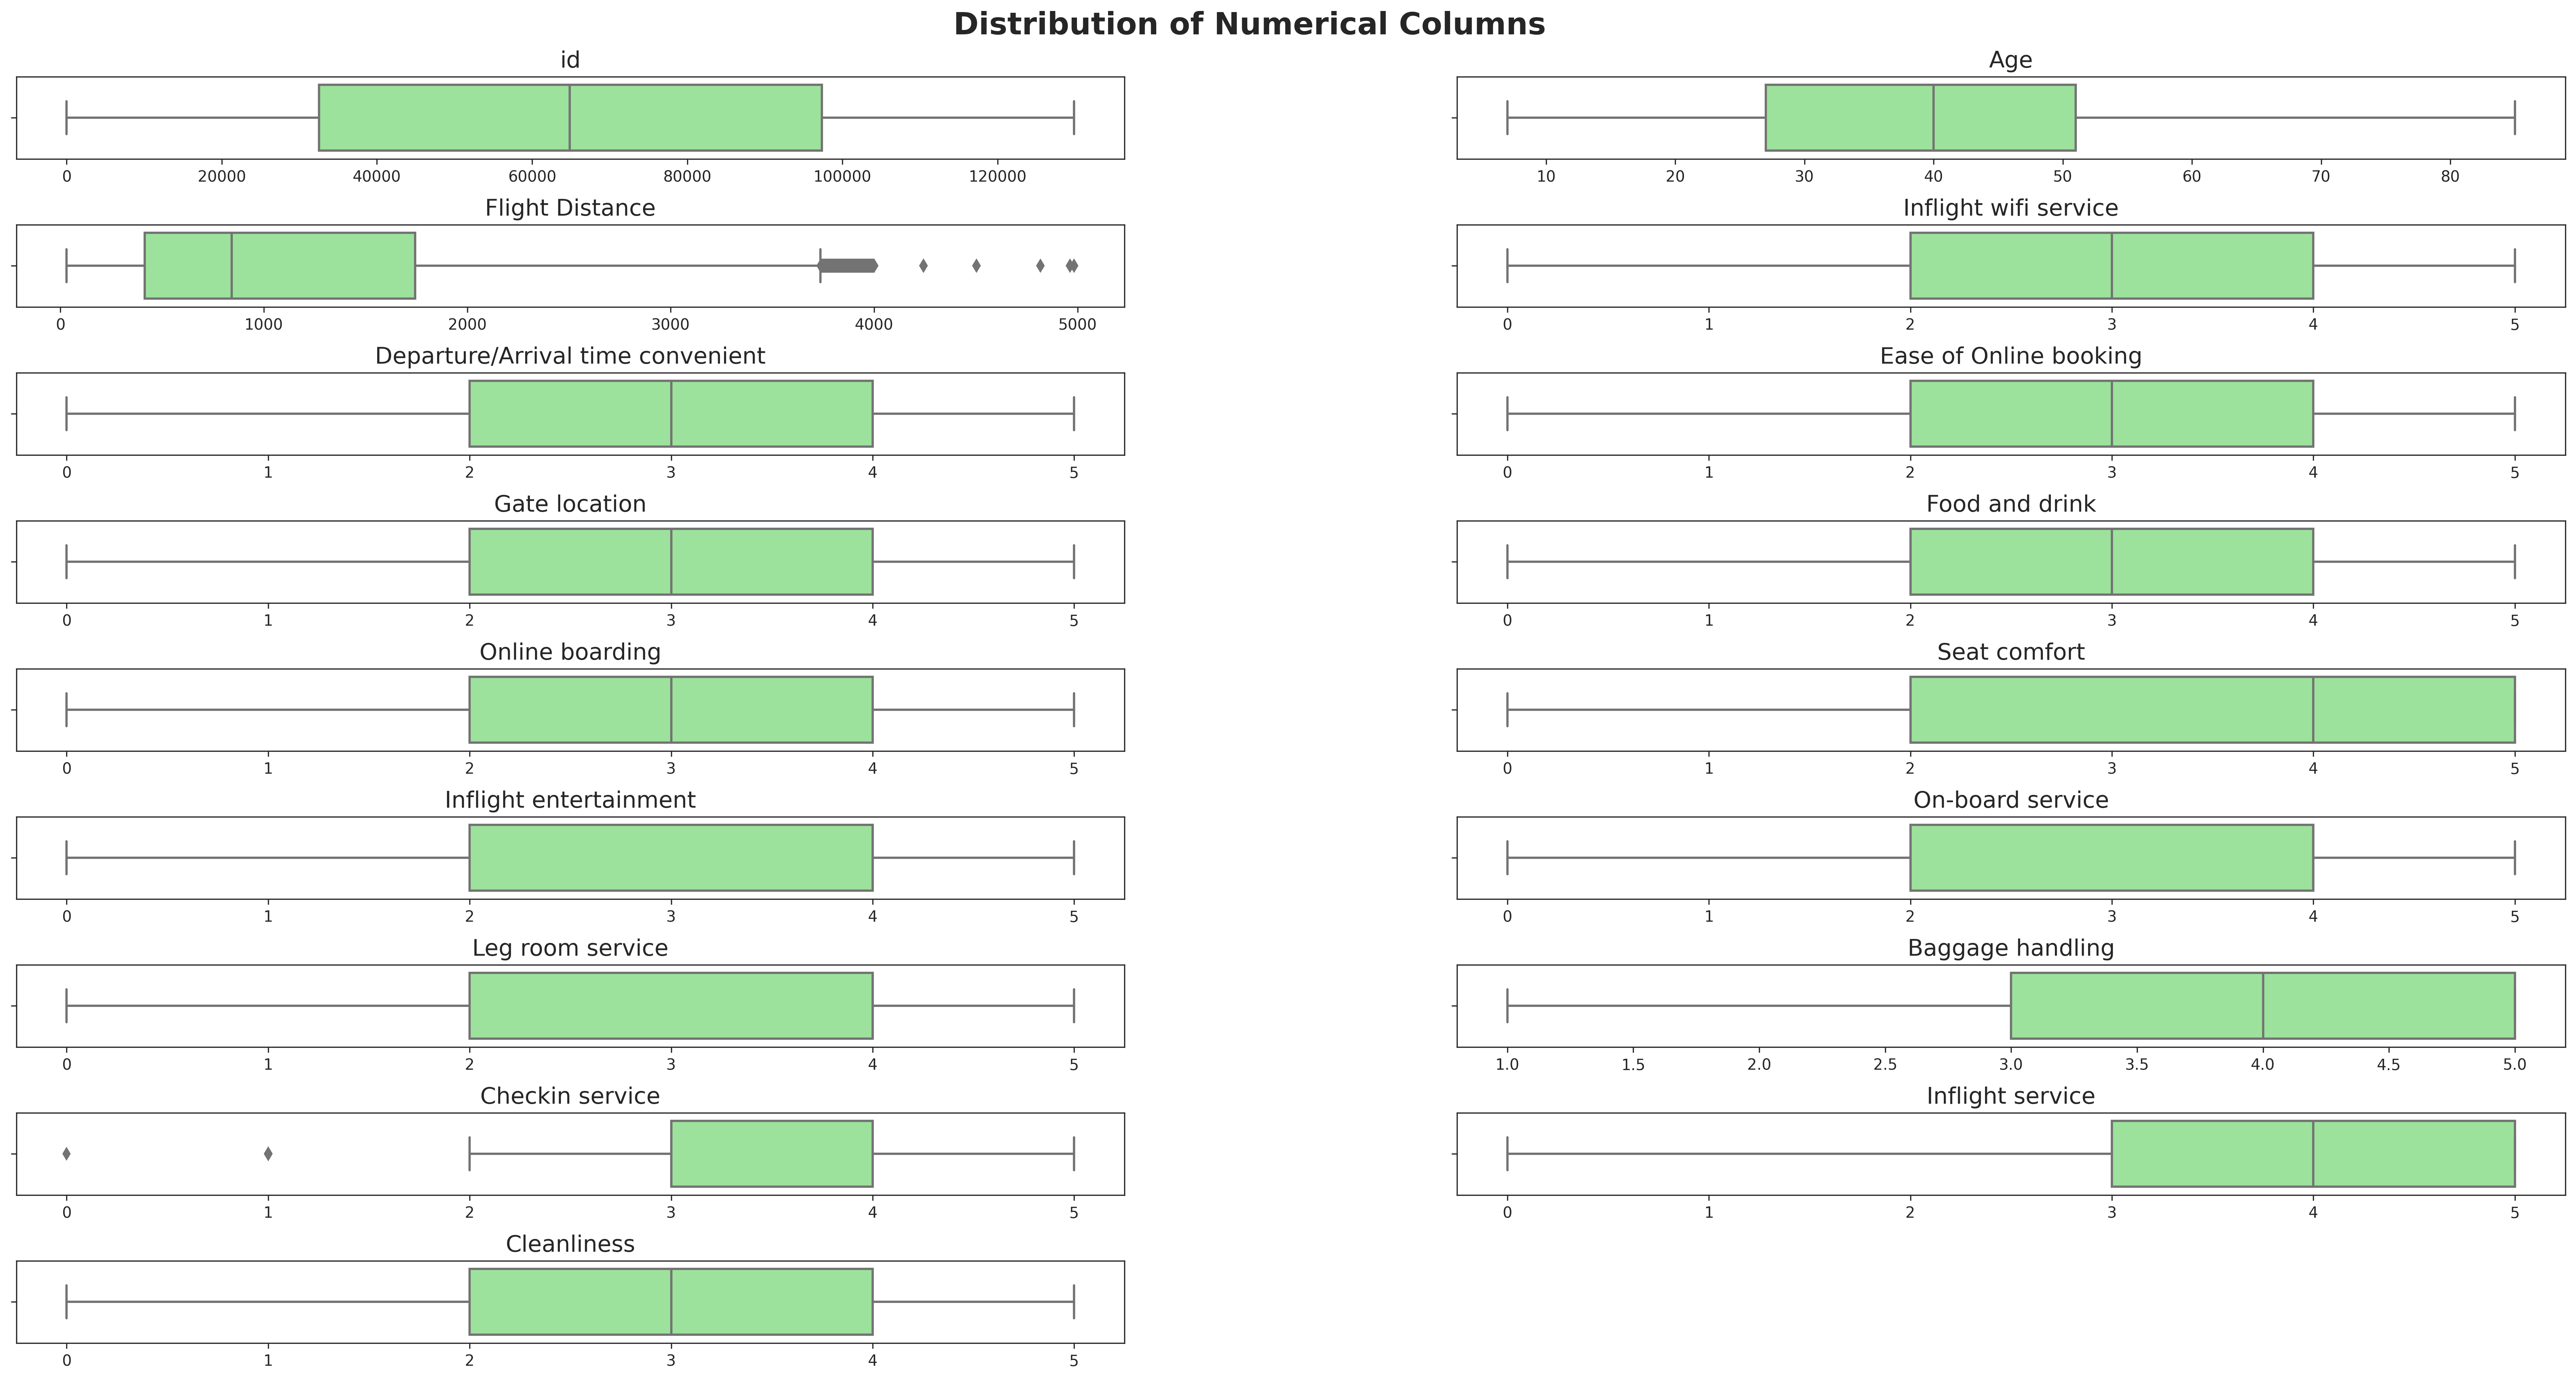

In [7]:
df_numerical_features = df_airline._get_numeric_data()
# df_numerical_features = df_numerical_features.drop(columns=["Customer Type", "id",
#                                                             "Gender", "Class",
#                                                             "Type of Travel",
#                                                             "Departure Delay in Minutes",
#                                                             "Arrival Delay in Minutes",
#                                                             "satisfaction"
#                                                             ], axis=1)
sns.set_style('ticks')
fig = plt.figure(figsize=(30,15),dpi=300)

for i,column_name in enumerate(df_numerical_features):
    if i < 17:
        plt.subplot(9,2,i+1)
        ax=sns.boxplot(x=column_name,data=df_numerical_features,color="lightgreen")
        ax.set_title(column_name,size=15)
        plt.xlabel('')

plt.subplots_adjust(hspace = 0.8, wspace=0.3)
fig.suptitle("Distribution of Numerical Columns",size=20,fontweight='bold',y=0.92)
plt.show()

# Explanatory Data Analysis

In [8]:
numerical_features=["Age","Departure Delay in Minutes" ,"Arrival Delay in Minutes","Flight Distance"]

# rest all are actually categorical
categorical_features=[x for x in df_airline.columns if x not in numerical_features]

# converting all ordinal features to categorical features
df_airline[categorical_features]=df_airline[categorical_features].astype("category")

#verifying the change
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 103904 non-null  category
 1   Gender                             103904 non-null  category
 2   Customer Type                      103904 non-null  category
 3   Age                                103904 non-null  int64   
 4   Type of Travel                     103904 non-null  category
 5   Class                              103904 non-null  category
 6   Flight Distance                    103904 non-null  int64   
 7   Inflight wifi service              103904 non-null  category
 8   Departure/Arrival time convenient  103904 non-null  category
 9   Ease of Online booking             103904 non-null  category
 10  Gate location                      103904 non-null  category
 11  Food and drink            

## Observation on Customer Satisfaction

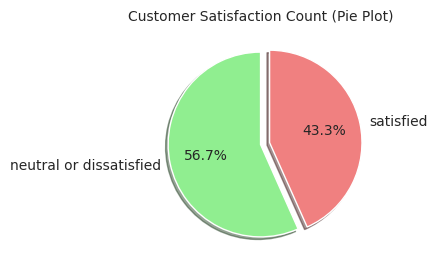

In [9]:
fig, (pie_plot) = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))

plot_labels = list(df_airline['satisfaction'].value_counts().index)
plot_values = list(df_airline["satisfaction"].value_counts().values)
explode = (0, 0.1)

pie_plot.pie(plot_values, labels=plot_labels, autopct="%1.1f%%", explode=explode, startangle=90, shadow=True, colors=["lightgreen", "lightcoral"])
pie_plot.set_title("Customer Satisfaction Count (Pie Plot)", fontsize=10)
plt.show()

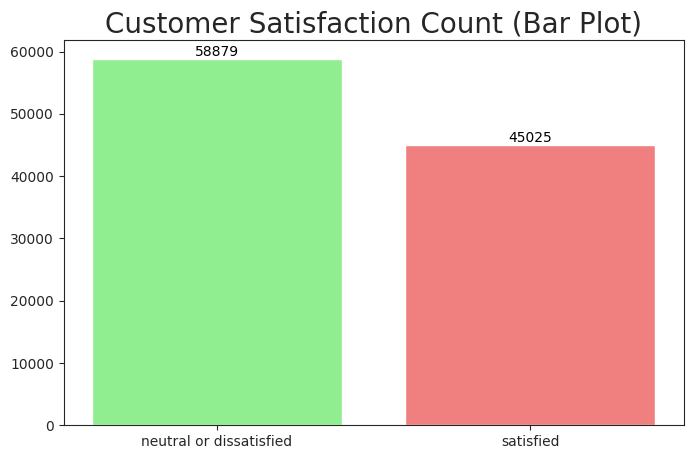

In [10]:
fig, (bar_plot) = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

bar_plot.bar(df_airline["satisfaction"].value_counts().index, df_airline["satisfaction"].value_counts(),
             color=["lightgreen", "lightcoral"])
bar_plot.set_title("Customer Satisfaction Count (Bar Plot)", fontsize=20)

for bars in bar_plot.containers:
    bar_plot.bar_label(bars, fmt='%d', color='black', fontsize=10)
plt.show()

## Oberservation on Gender

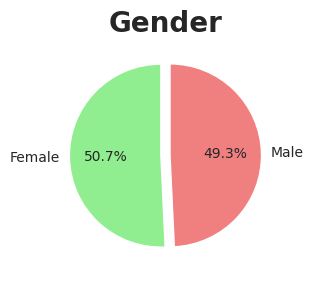

In [11]:
fig = plt.figure(figsize=(6,3))
grid = gridspec.GridSpec(nrows = 1,ncols = 2,figure = fig)

ax3 = fig.add_subplot(grid[0,1:])
ax3.set_title("Gender",weight = "bold",fontsize = 20)
label = list(df_airline['Gender'].value_counts().index)
value = list(df_airline["Gender"].value_counts().values)
ax3.pie(value,labels=label,autopct="%1.1f%%",explode = (0,0.1),startangle = 90,
        colors=["lightgreen", "lightcoral"])
ax3.axis("equal")
plt.show()

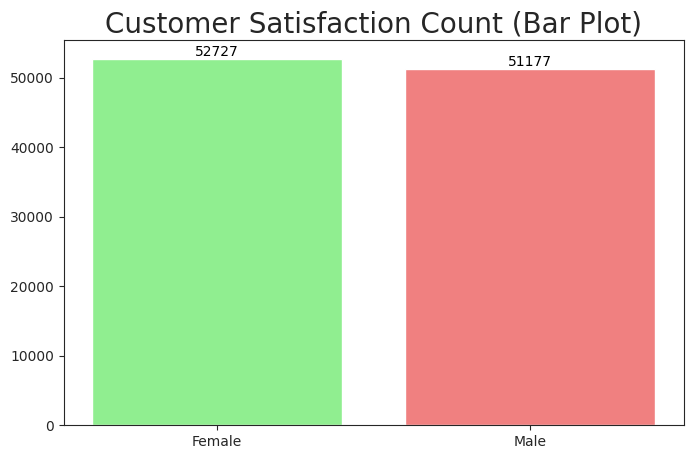

In [12]:
fig, (bar_plot) = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

bar_plot.bar(df_airline["Gender"].value_counts().index,
             df_airline["Gender"].value_counts(),
             color=["lightgreen", "lightcoral"])
bar_plot.set_title("Customer Satisfaction Count (Bar Plot)", fontsize=20)

for bars in bar_plot.containers:
    bar_plot.bar_label(bars, fmt='%d', color='black', fontsize=10)
plt.show()

High number of passengers are females, but almost the same just slight diffrence in number.

### Obervations on Customer Type

Text(0.5, 1.0, 'Customer Type')

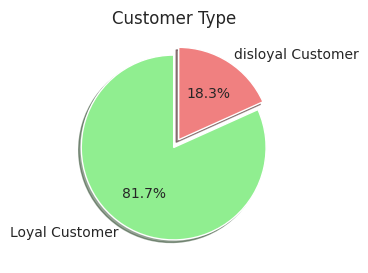

In [13]:
fig,(ax1) = plt.subplots(nrows = 1,
                         ncols = 1,
                         figsize=(6,3))

# plot 1



# plot 2

label = list(df_airline['Customer Type'].value_counts().index)
value = list(df_airline["Customer Type"].value_counts().values)
ax1.pie(value,labels=label,autopct="%1.1f%%",
        explode = (0,0.1),startangle = 90,
        shadow = True,
        colors=["lightgreen", "lightcoral"])
ax1.set_title("Customer Type")

In [14]:
def provide_pie_plot(variable="", colors=[]):
    fig,(ax1) = plt.subplots(nrows = 1,
                         ncols = 1,
                         figsize=(6,3))

    # plot 1



    # plot 2

    label = list(df_airline[variable].value_counts().index)
    value = list(df_airline[variable].value_counts().values)
    ax1.pie(value,labels=label,autopct="%1.1f%%",
        # explode = (0,0.1),
        startangle = 90,
        shadow = True,
        colors=["lightgreen", "lightcoral", "lightblue"] if not colors else colors)
    ax1.set_title(str(variable.capitalize()))

def provide_count_plot(variable="", colors=[]):
    fig, (bar_plot) = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

    bar_plot.bar(df_airline[variable].value_counts().index,
                df_airline[variable].value_counts(),
                color=["lightgreen", "lightcoral"] if not colors else colors)
    bar_plot.set_title(str(variable.capitalize())+" Count (Bar Plot)", fontsize=20)

    for bars in bar_plot.containers:
        bar_plot.bar_label(bars, fmt='%d', color='black', fontsize=10)
    plt.show()

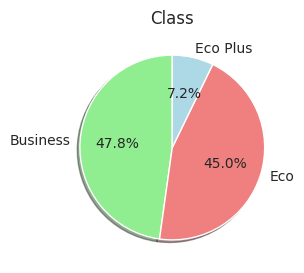

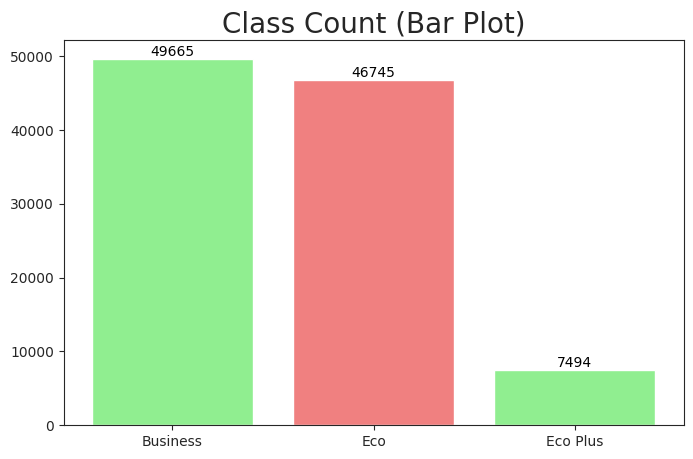

In [15]:
provide_pie_plot(variable="Class")
provide_count_plot(variable="Class")

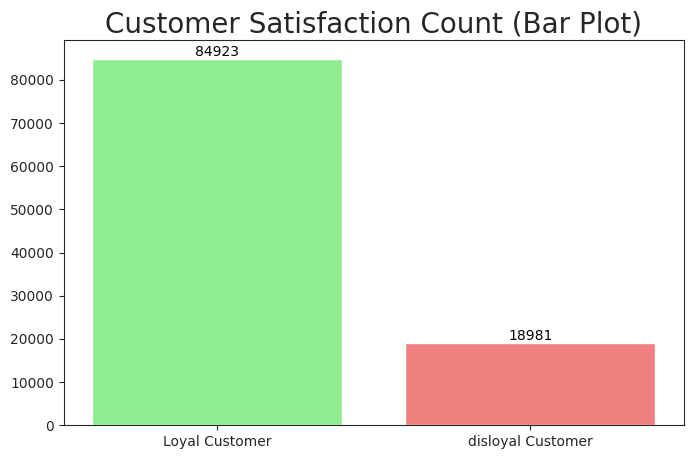

In [16]:
fig, (bar_plot) = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

bar_plot.bar(df_airline["Customer Type"].value_counts().index,
             df_airline["Customer Type"].value_counts(),
             color=["lightgreen", "lightcoral"])
bar_plot.set_title("Customer Satisfaction Count (Bar Plot)", fontsize=20)

for bars in bar_plot.containers:
    bar_plot.bar_label(bars, fmt='%d', color='black', fontsize=10)
plt.show()

Majority of the customers are giving the right feedback and thus loyal.

## Obervations On Age

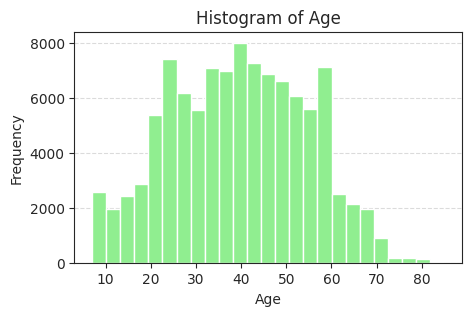

In [17]:
plt.figure(figsize=(5, 3))
df_airline.Age.plot.hist(bins = 25, color=["lightgreen", "lightcoral"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age")

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

In [18]:
##Higher no. of people are of the age group 40-45

## Checking Distribution of the features with respect to Target variable Satisfaction

### Distribution on Gender

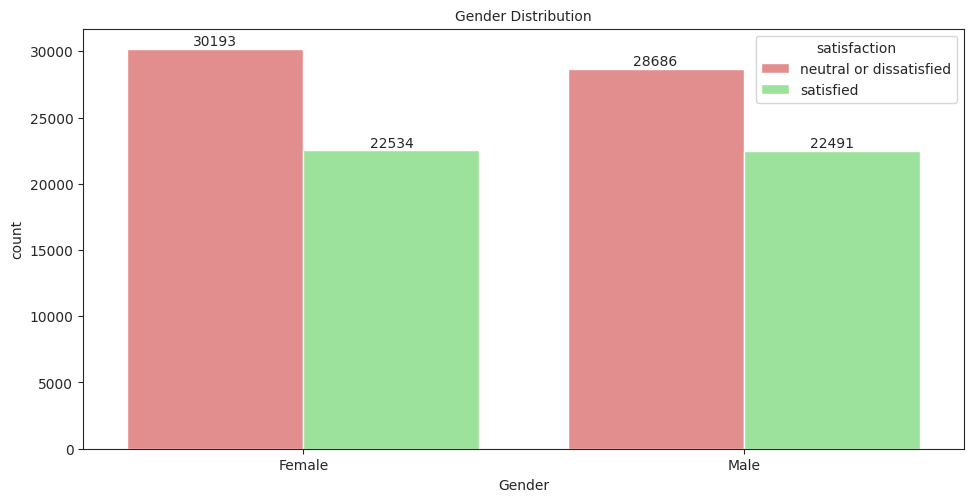

In [19]:
fig = plt.figure(figsize=(25,12))
grid = gridspec.GridSpec(nrows = 2, ncols = 2, figure = fig)


ax1 = fig.add_subplot(grid[0,:1])
ax1.set_title("Gender Distribution",fontsize = 10)


sns.countplot(x = df_airline["Gender"],
              hue = df_airline["satisfaction"],
              ax = ax1,
              palette=[ "lightcoral", "lightgreen"])


for bars in ax1.containers:    # for showing count
    ax1.bar_label(bars)

### Distribution on Class

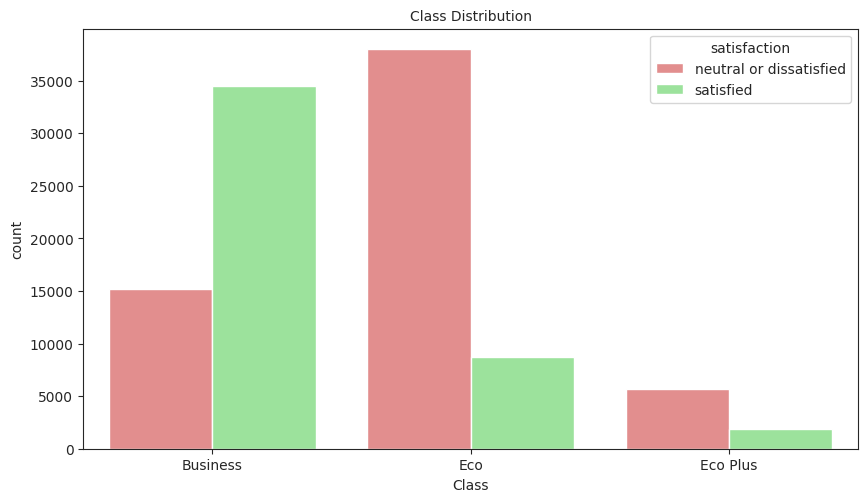

In [20]:
fig = plt.figure(figsize=(22,12))
ax2 = fig.add_subplot(grid[0,:1])
ax2.set_title("Class Distribution",fontsize = 10)
sns.countplot(x = df_airline["Class"],
              hue = df_airline["satisfaction"],
              ax = ax2,
              palette=[ "lightcoral", "lightgreen"])
plt.show()

In [21]:
##People travelling in business class are more satisfied comparison to other classes.

### Distribution on Services Offered

Text(0.5, 1.0, 'On-board service')

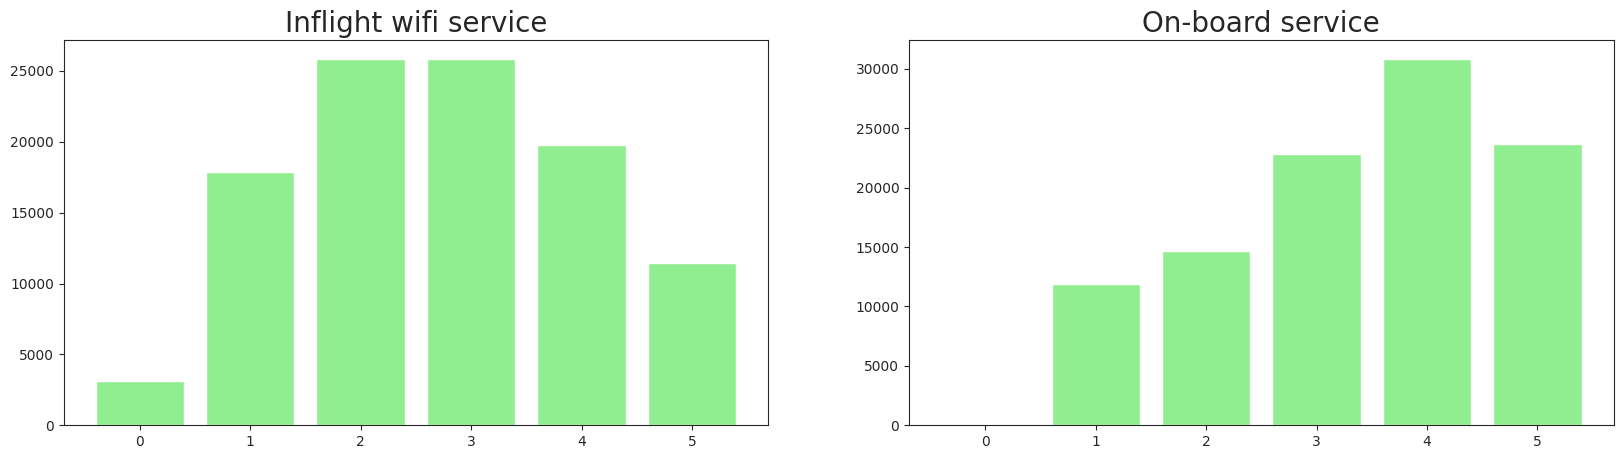

In [22]:
df_airline["Inflight wifi service"].value_counts()
df_airline["On-board service"].value_counts()

fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2, figsize=(20,5))

# plot 1

ax1.bar(df_airline["Inflight wifi service"].value_counts().index,
        df_airline["Inflight wifi service"].value_counts(),
        color=["lightgreen"])
ax1.set_title("Inflight wifi service",fontsize = 20)


# plot 2

ax2.bar(df_airline["On-board service"].value_counts().index,
        df_airline["On-board service"].value_counts(),
        color=[ "lightgreen"])
ax2.set_title("On-board service",fontsize = 20)

### Count plots to check the dstribution of categorical Feature

In [23]:
# for j in categorical_features:
#     plt.figure(figsize=(3,3))
#     sns.countplot(x=j, data=df_airline[categorical_features],
#                   hue="satisfaction",
#                   palette="pastel",
#                   edgecolor = "black")
#     plt.title(i)

In [27]:
# labels=[]
# pie, ax = plt.subplots(6,3,figsize=[30,30])

# for i,col in enumerate(categorical_features):
#     #pie, ax = plt.subplots(5,4,figsize=[15,10])
#     if col=="satisfaction":
#         continue;
#     xc=pd.DataFrame(df_airline[col].value_counts())


#     labels = df_airline[col].unique()
#     if len(labels)==3:
#         colors = ['#7b77ff', '#7df691',"#ad00ad"]
#         r=[0.02]*3
#     if len(labels)==2:
#         colors = ['#7b77ff', '#7df691']
#         r=[0.02]*2
#     if len(labels)==6:
#         colors = ['#FFA15A','#19D3F3','#FF6692','#B6E880','#FF97FF','#FECB52']
#         r=[0.02]*6
#     if len(labels)==5:
#         colors = ['#FFA15A','#19D3F3','#FF6692','#FF97FF','#FECB52']
#         r=[0.02]*5



#     ax[i//3, i%3].pie(x = df_airline[col].value_counts(),autopct='%.2f%%',
#      labels=xc.index, pctdistance=0.5, textprops={'fontsize': 8}, color = colors)
#     plt.title(f'{i}  distribution',)
#     ax[i//3, i%3].set_title(col)

# plt.show()

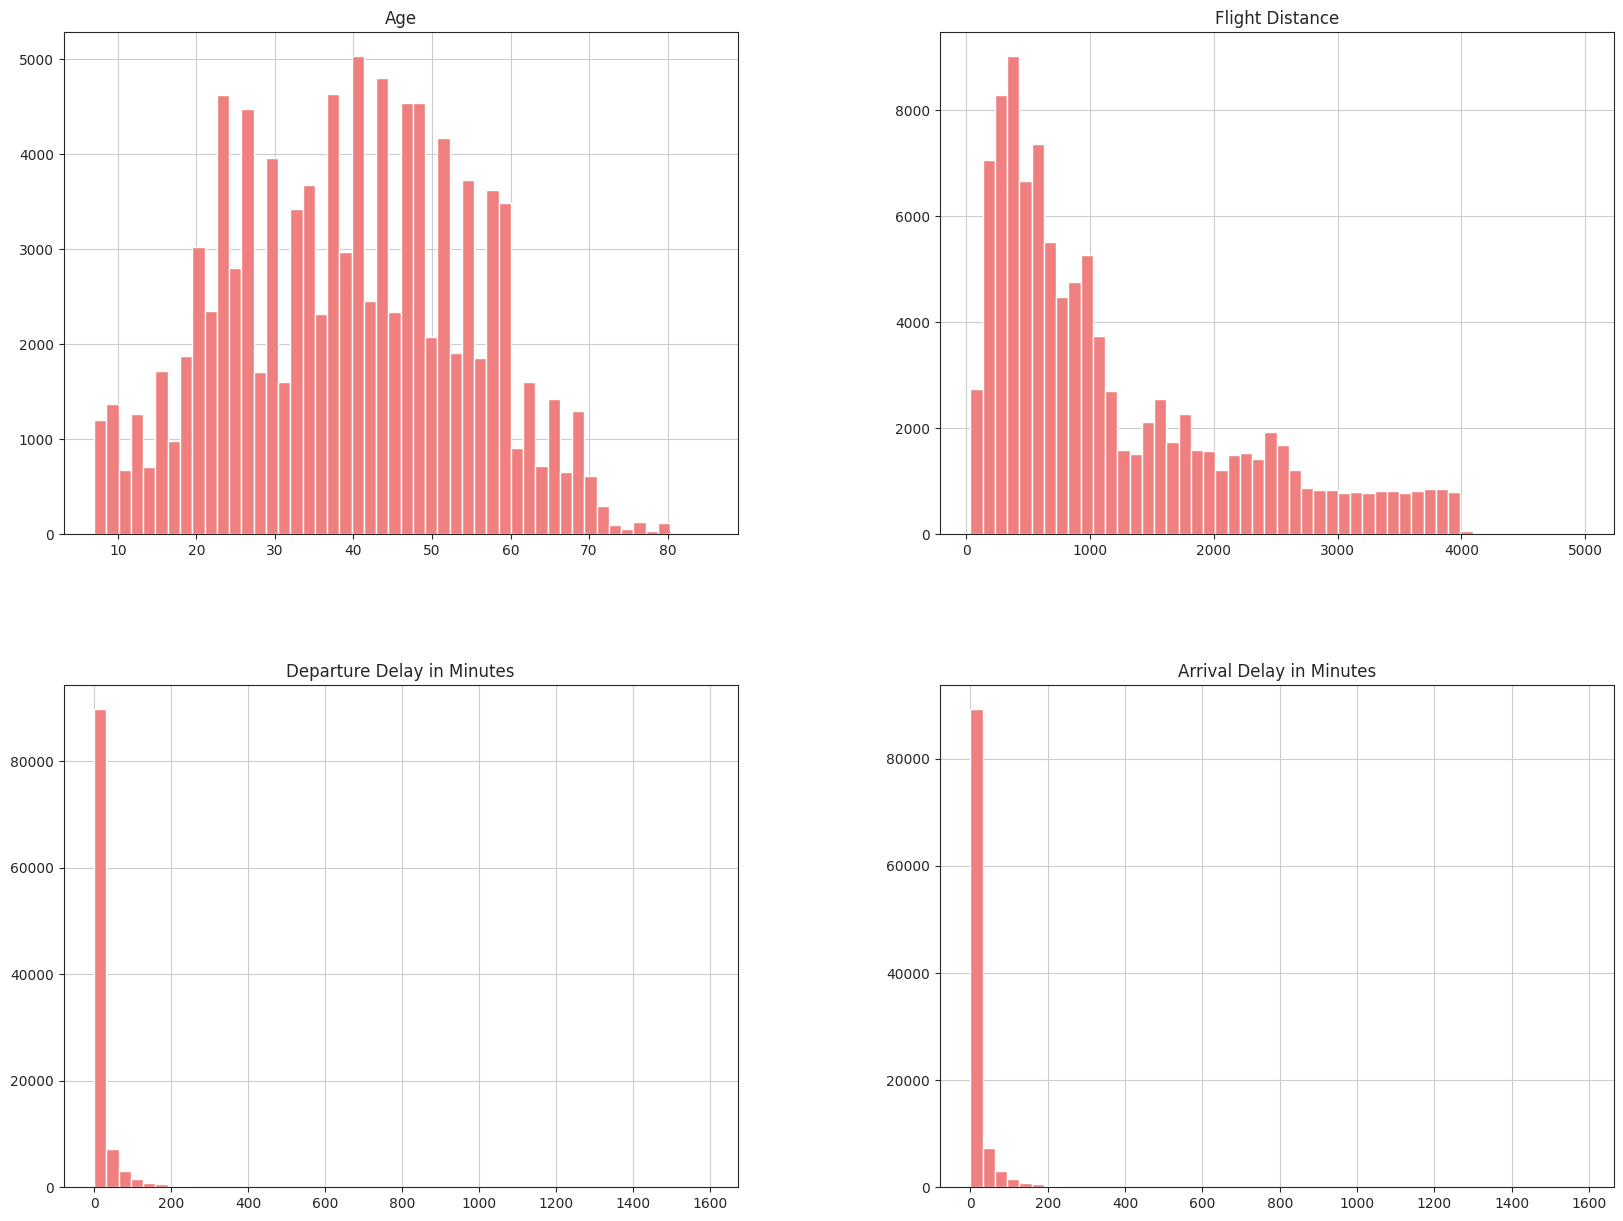

In [28]:
df_airline.hist(bins=50, figsize=(20,15),
                color=["lightcoral"])
plt.show()

In [29]:
import pandas as pd

# Define the bin edges and labels
bin_edges = [0, 18, 25, 35, 45, 55, 65, float('inf')]
bin_labels = ['0-18', '19-25', '26-35',
              '36-45', '46-55', '56-65', '66+']

df_airline['Age Group'] = pd.cut(df_airline['Age'], bins=bin_edges,
                         labels=bin_labels, right=False)

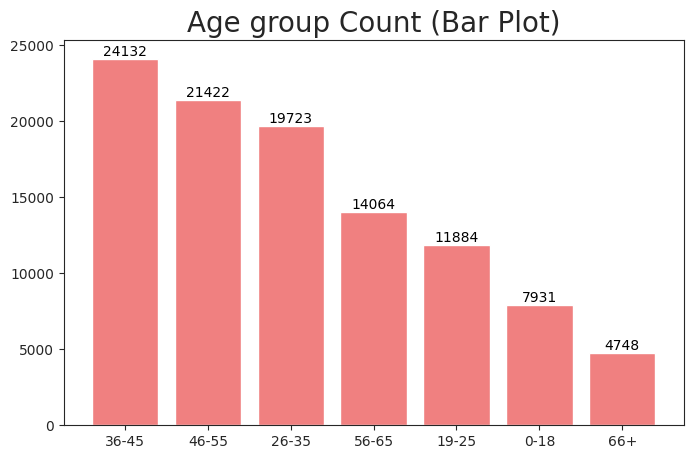

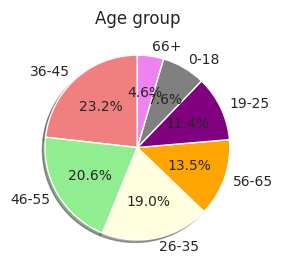

In [30]:
provide_count_plot(variable="Age Group", colors=["lightcoral"])
provide_pie_plot(variable="Age Group", colors=["lightcoral", "lightgreen",
                                               "lightyellow", "orange",
                                               "purple", "grey", "violet"])

In [31]:
def get_satisfaction_plot(variable="", colors=[]):
    fig = plt.figure(figsize=(22,12))
    ax2 = fig.add_subplot(grid[0,:1])
    ax2.set_title(str(variable).capitalize(),fontsize = 10)
    sns.countplot(x = df_airline[variable],
                hue = df_airline["satisfaction"],
                ax = ax2,
                palette=[  "lightcoral", "lightgreen"] if not colors else colors)
    plt.show()

def get_travel_type_plot(variable="", colors=[]):
    fig = plt.figure(figsize=(22,12))
    ax2 = fig.add_subplot(grid[0,:1])
    ax2.set_title(str(variable).capitalize(),fontsize = 10)
    sns.countplot(x = df_airline[variable],
                hue = df_airline["Class"],
                ax = ax2,
                palette=["lightcoral", "lightgreen", "lightblue"] if not colors else colors)
    plt.show()

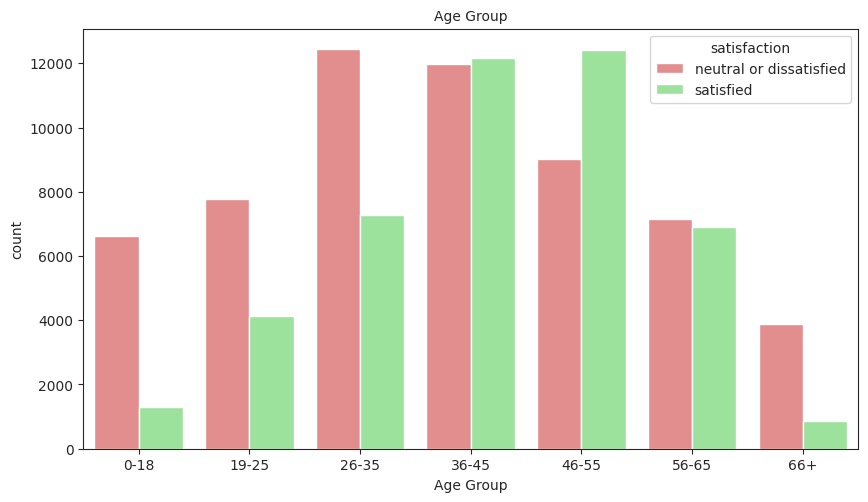

In [32]:
fig = plt.figure(figsize=(22,12))
ax2 = fig.add_subplot(grid[0,:1])
ax2.set_title("Age Group",fontsize = 10)
sns.countplot(x = df_airline["Age Group"],
              hue = df_airline["satisfaction"],
              ax = ax2,
              palette=["lightcoral", "lightgreen"])
plt.show()

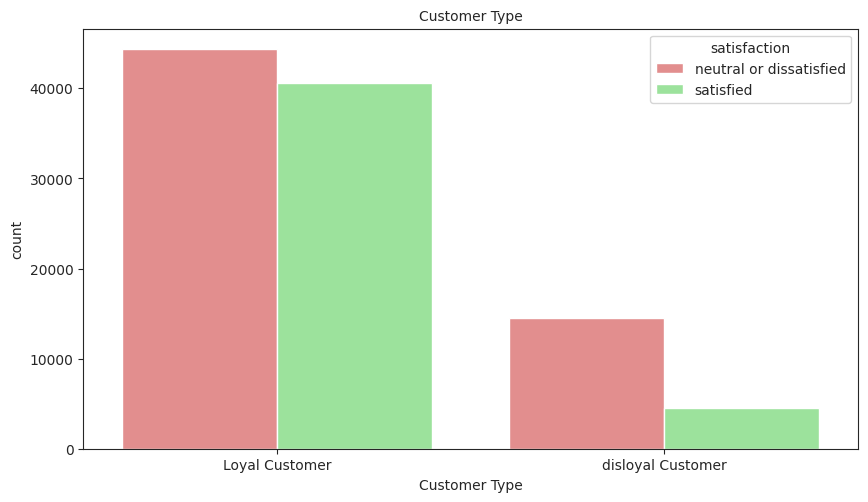

In [33]:
fig = plt.figure(figsize=(22,12))
ax2 = fig.add_subplot(grid[0,:1])
ax2.set_title("Customer Type",fontsize = 10)
sns.countplot(x = df_airline["Customer Type"],
              hue = df_airline["satisfaction"],
              ax = ax2,
              palette=[  "lightcoral", "lightgreen"])
plt.show()

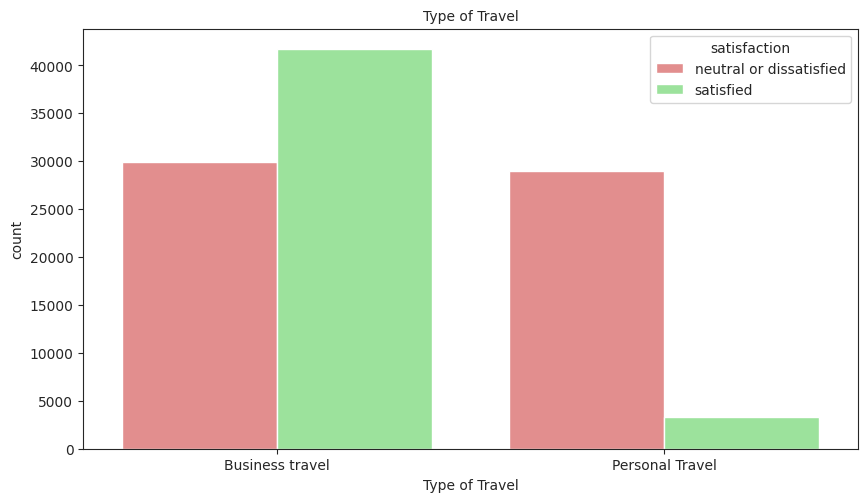

In [34]:
fig = plt.figure(figsize=(22,12))
ax2 = fig.add_subplot(grid[0,:1])
ax2.set_title("Type of Travel",fontsize = 10)
sns.countplot(x = df_airline["Type of Travel"],
              hue = df_airline["satisfaction"],
              ax = ax2,
              palette=[  "lightcoral", "lightgreen"])
plt.show()

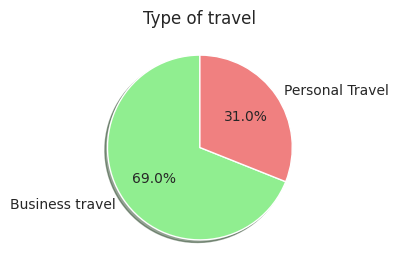

In [35]:
provide_pie_plot(variable="Type of Travel")

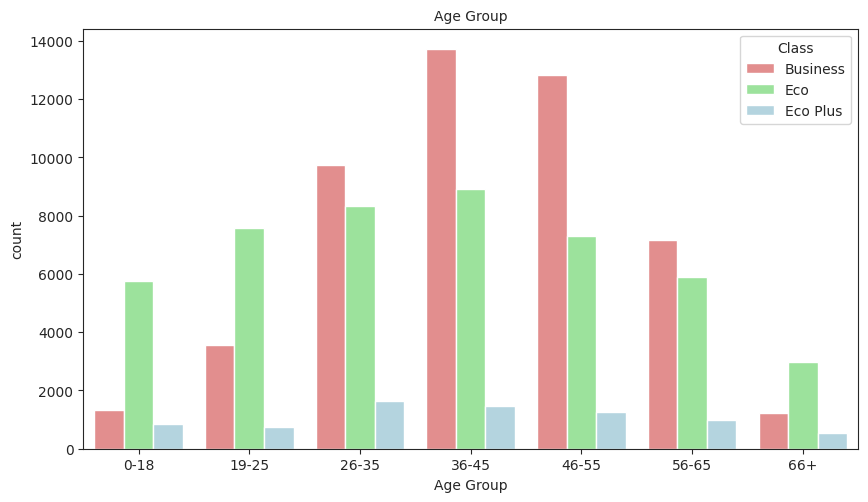

In [36]:
fig = plt.figure(figsize=(22,12))
ax2 = fig.add_subplot(grid[0,:1])
ax2.set_title("Age Group",fontsize = 10)
sns.countplot(x = df_airline["Age Group"],
              hue = df_airline["Class"],
              ax = ax2,
              palette=["lightcoral", "lightgreen", "lightblue"])
plt.show()

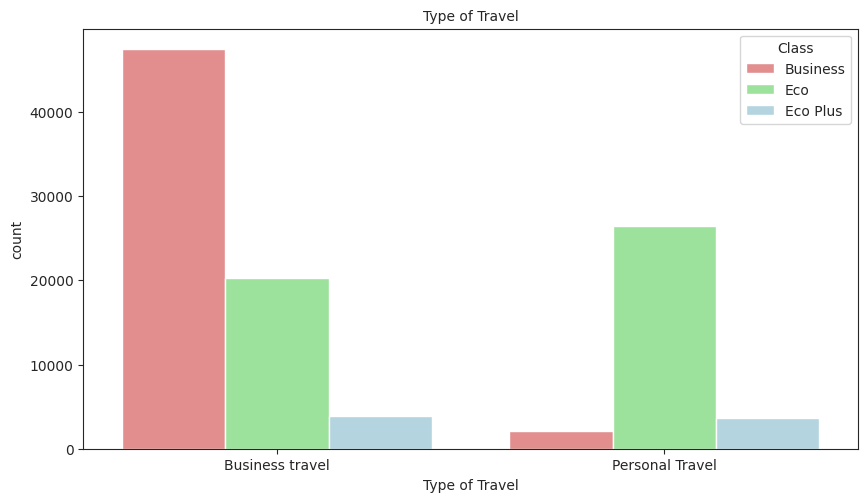

In [37]:
fig = plt.figure(figsize=(22,12))
ax2 = fig.add_subplot(grid[0,:1])
ax2.set_title("Type of Travel",fontsize = 10)
sns.countplot(x = df_airline["Type of Travel"],
              hue = df_airline["Class"],
              ax = ax2,
              palette=["lightcoral", "lightgreen", "lightblue"])
plt.show()

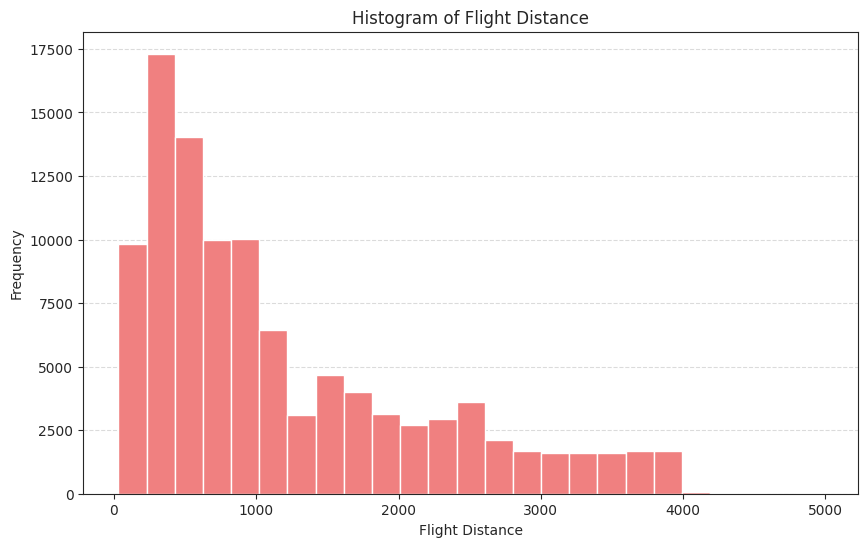

In [38]:
plt.figure(figsize=(10, 6))  # Set the figure size to 10x6 inches

df_airline['Flight Distance'].plot.hist(bins=25, color="lightcoral")  # Set the color for the bins
plt.xlabel("Flight Distance")
plt.ylabel("Frequency")
plt.title("Histogram of Flight Distance")

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [39]:
distance_group_labels = ['0-414', '415-586', '587-719', '720-844',
                         '845-1032', '1033-1289', '1290-1744', '1745-4983']

# Cut the 'Flight Distance' column into 8 groups
df_airline['Distance Group'] = pd.cut(df_airline['Flight Distance'],
                                    bins=[0, 414, 586, 719, 844, 1032, 1289, 1744, 4983],
                                    labels=distance_group_labels,
                                    include_lowest=True)

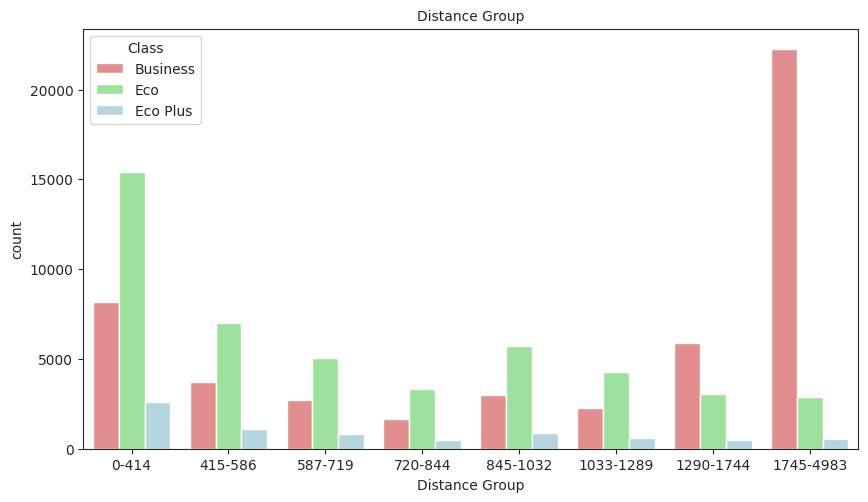

In [40]:
fig = plt.figure(figsize=(22,12))
ax2 = fig.add_subplot(grid[0,:1])
ax2.set_title("Distance Group",fontsize = 10)
sns.countplot(x = df_airline["Distance Group"],
              hue = df_airline["Class"],
              ax = ax2,
              palette=["lightcoral", "lightgreen", "lightblue"])
plt.show()

<Axes: title={'center': 'Distance Group'}, xlabel='Distance Group', ylabel='count'>

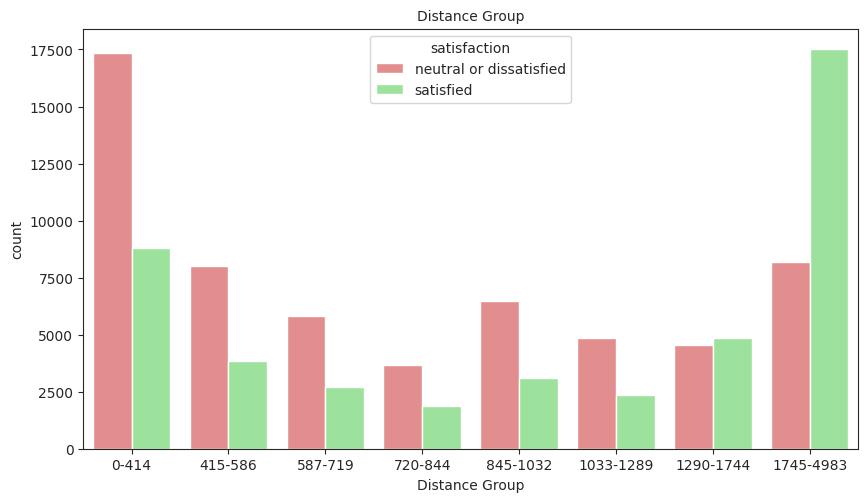

In [41]:
fig = plt.figure(figsize=(22,12))
ax2 = fig.add_subplot(grid[0,:1])
ax2.set_title("Distance Group",fontsize = 10)
sns.countplot(x = df_airline["Distance Group"],
              hue = df_airline["satisfaction"],
              ax = ax2,
              palette=["lightcoral", "lightgreen", "lightblue"])

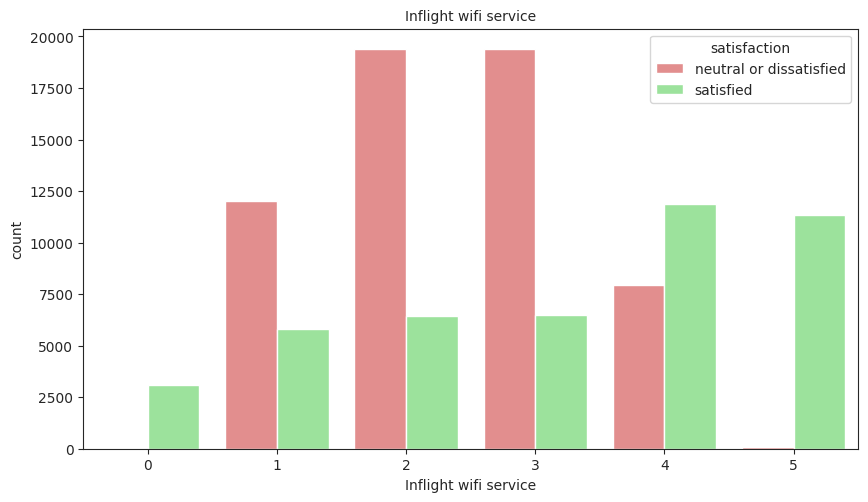

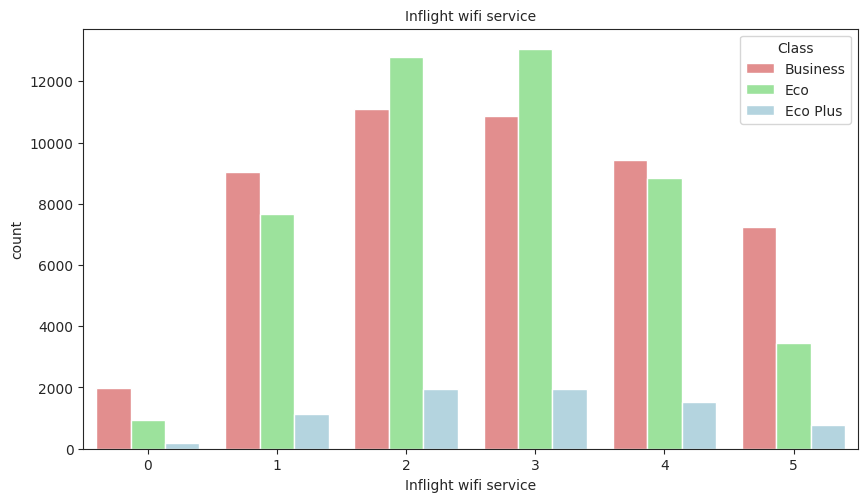

In [42]:
get_satisfaction_plot(variable="Inflight wifi service")
get_travel_type_plot(variable="Inflight wifi service")

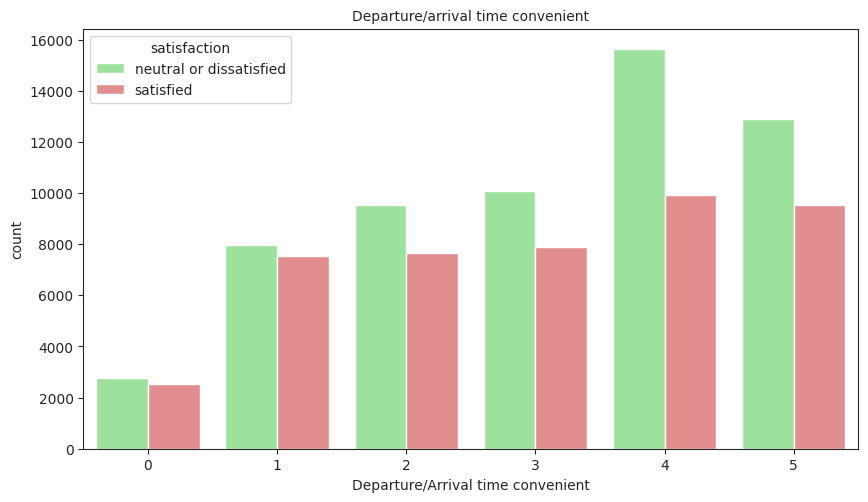

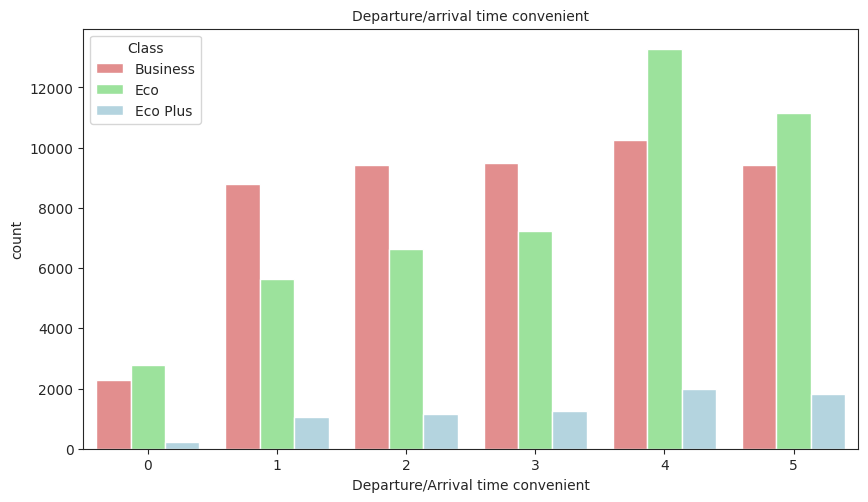

In [43]:
get_satisfaction_plot(variable="Departure/Arrival time convenient",
                      colors=[ "lightgreen", "lightcoral"])
get_travel_type_plot(variable="Departure/Arrival time convenient")

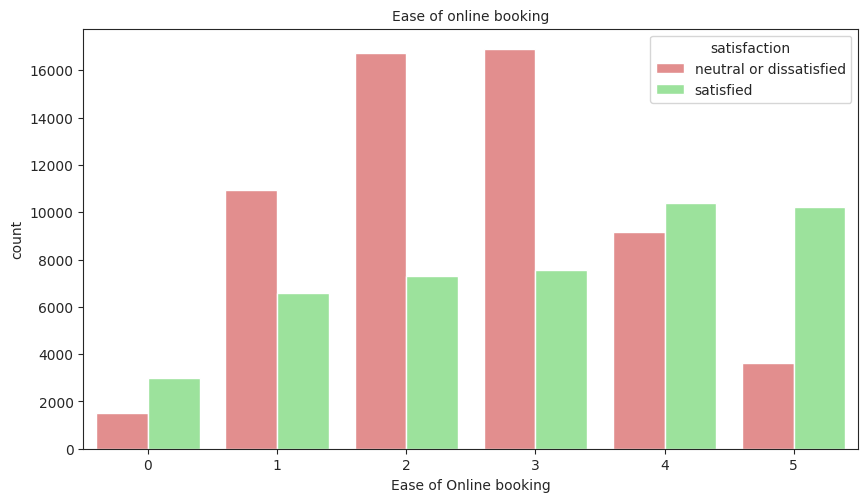

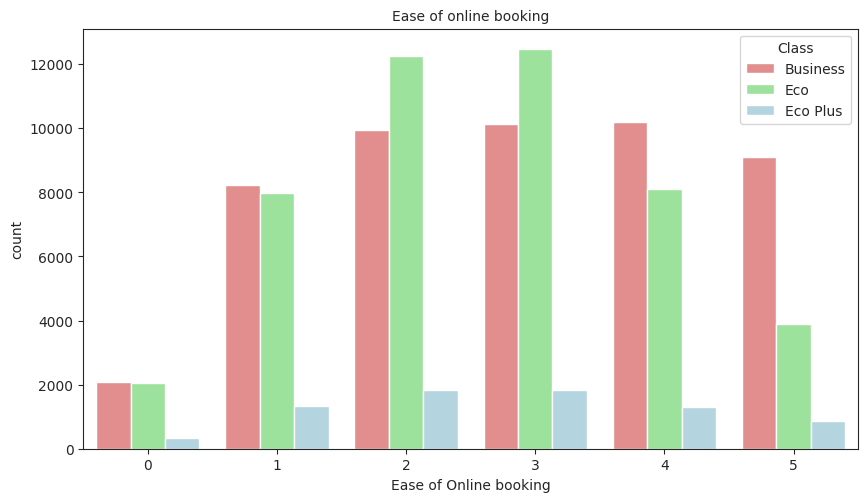

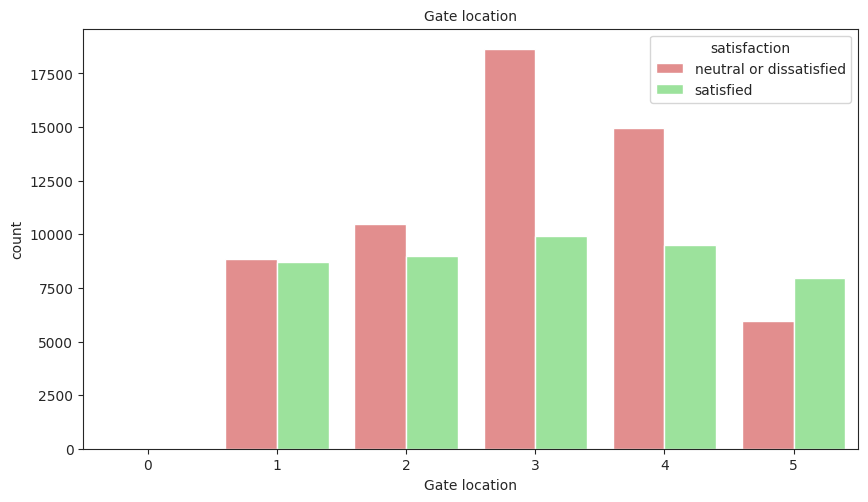

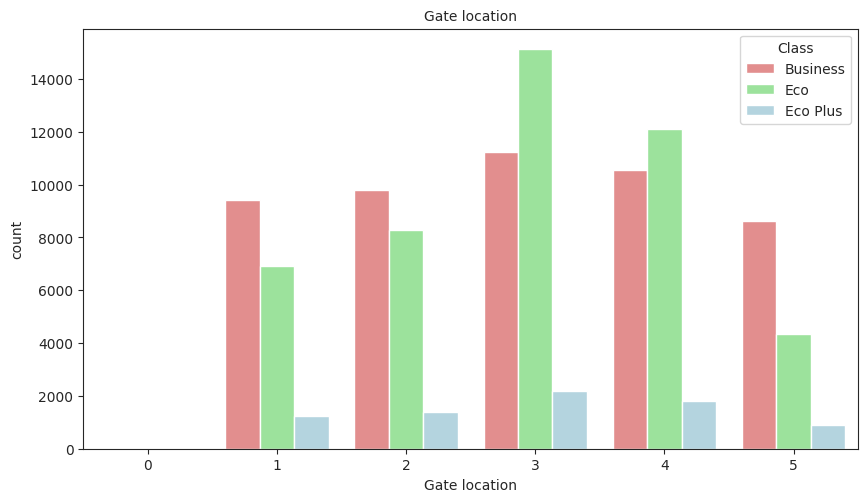

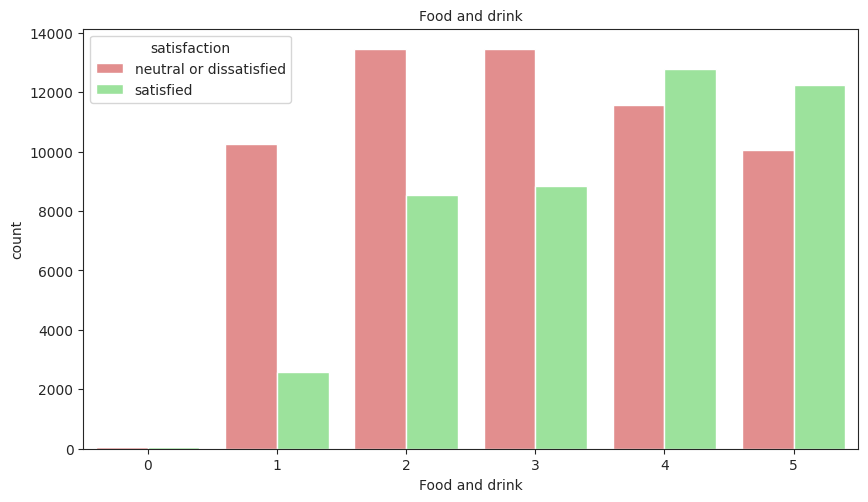

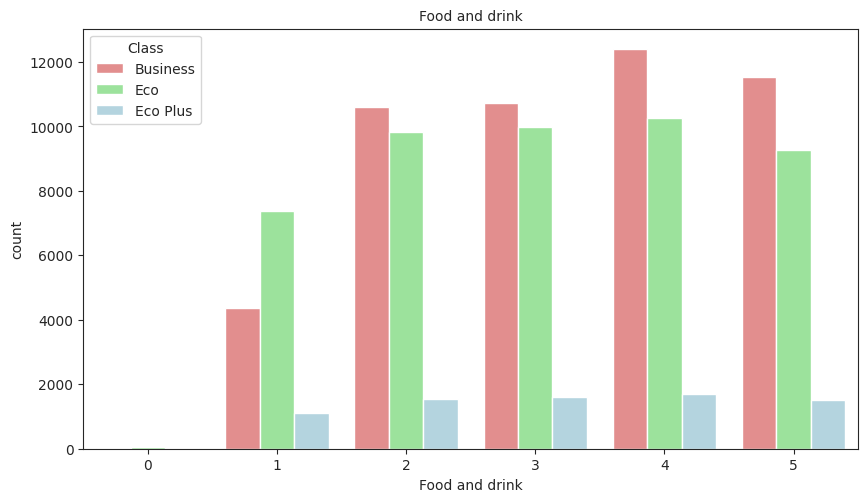

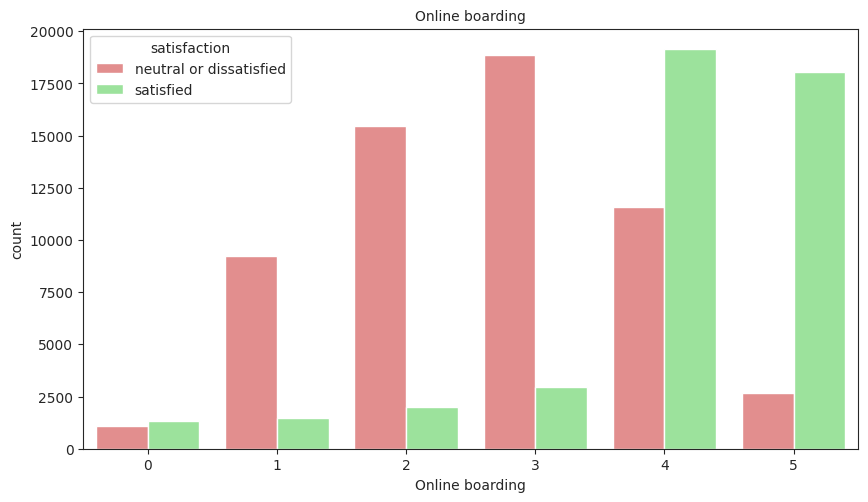

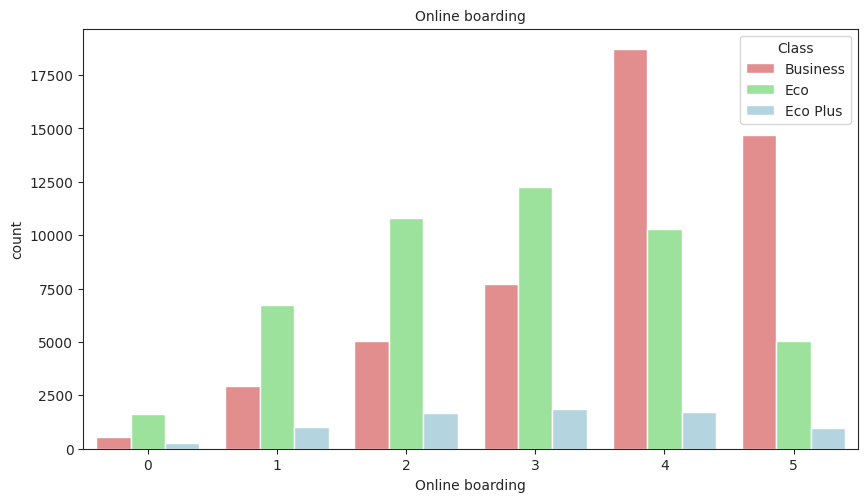

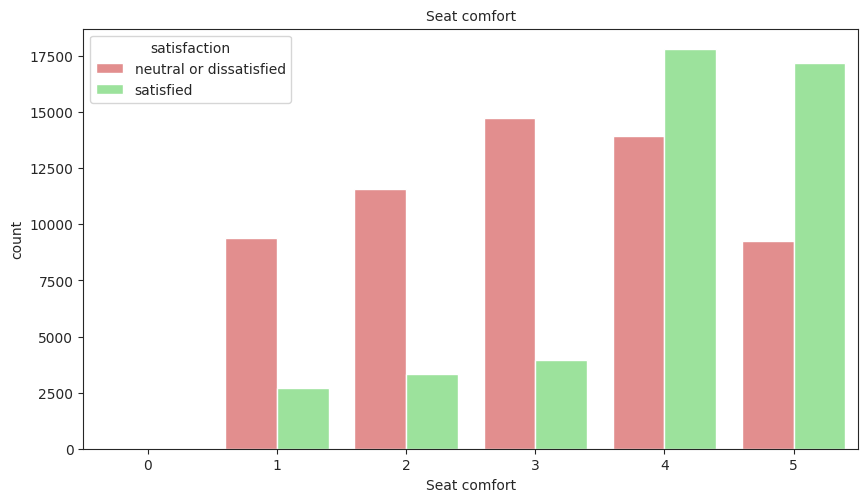

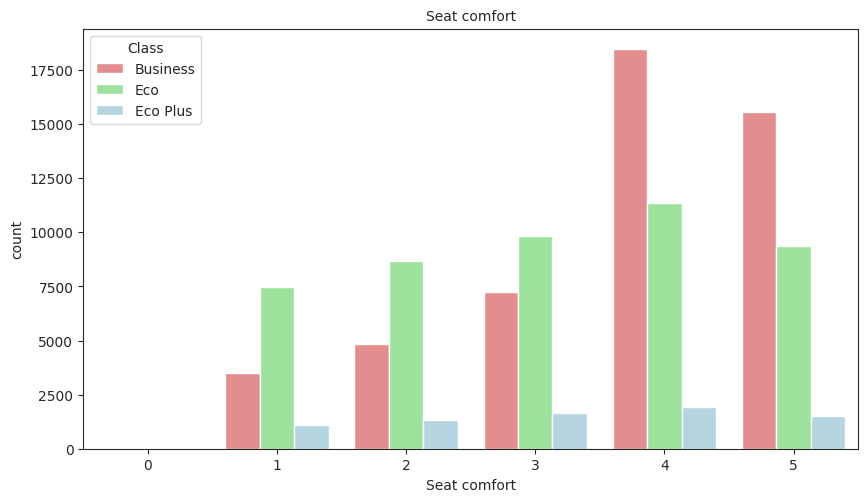

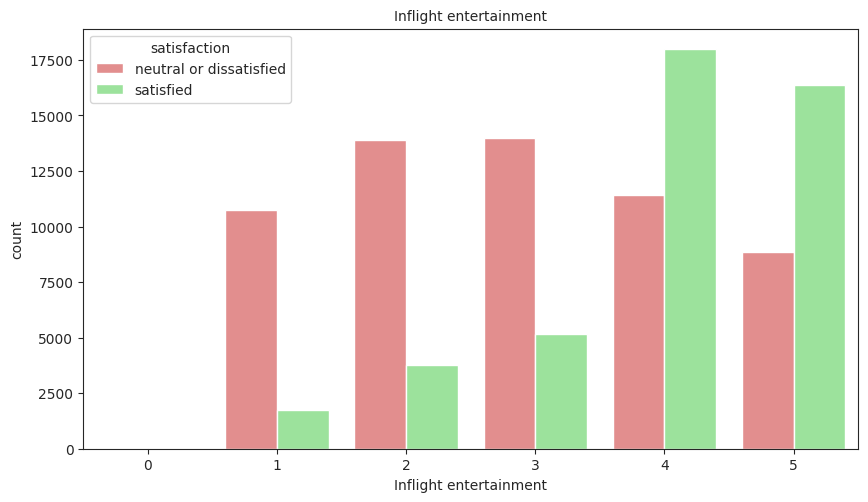

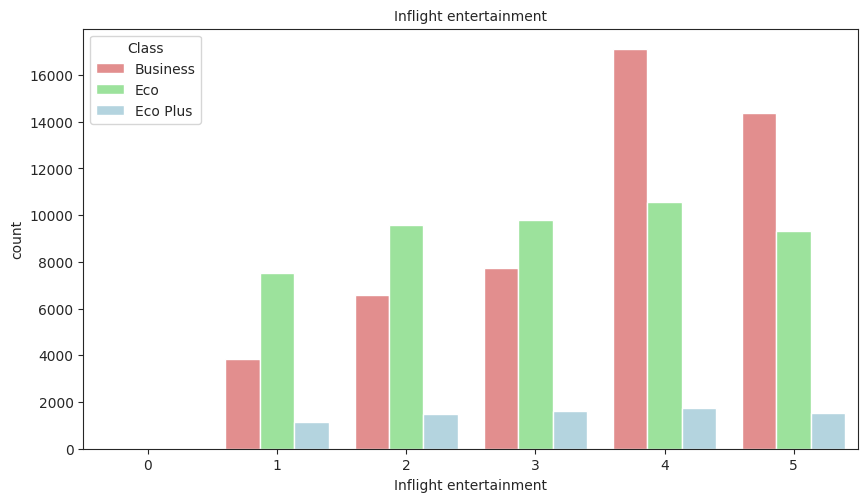

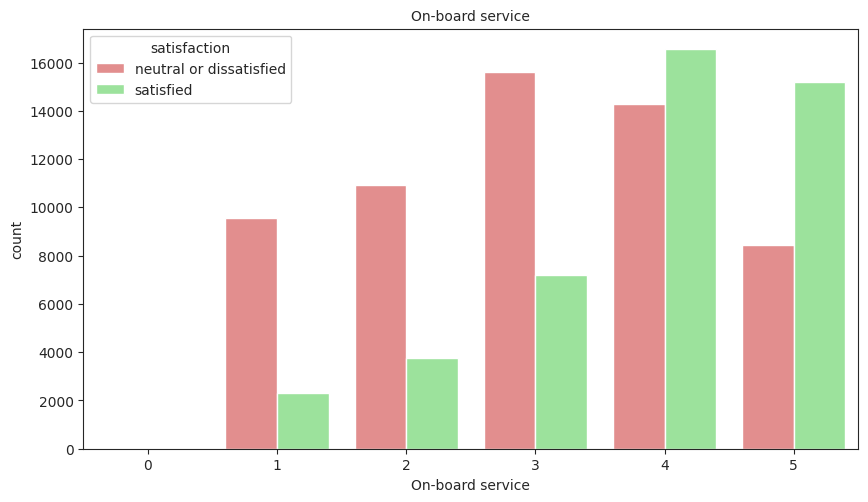

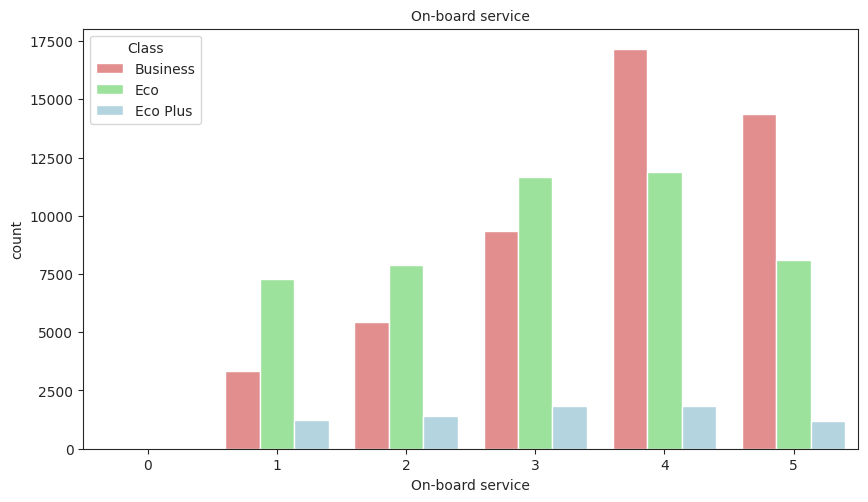

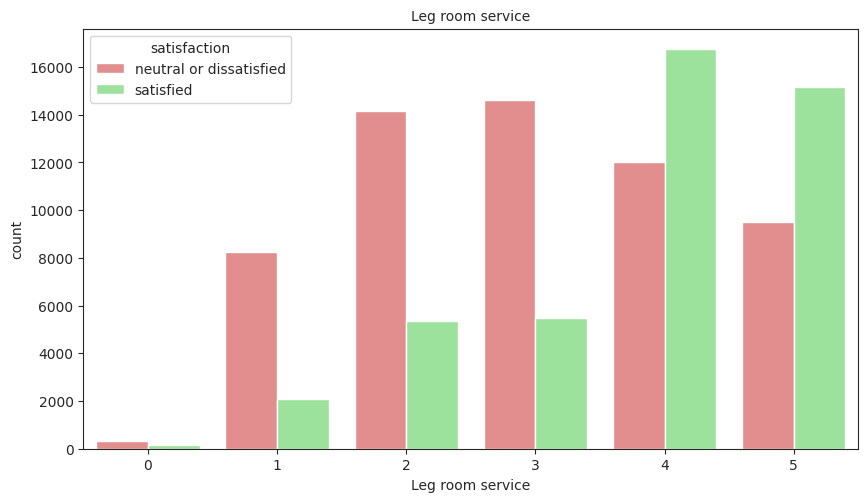

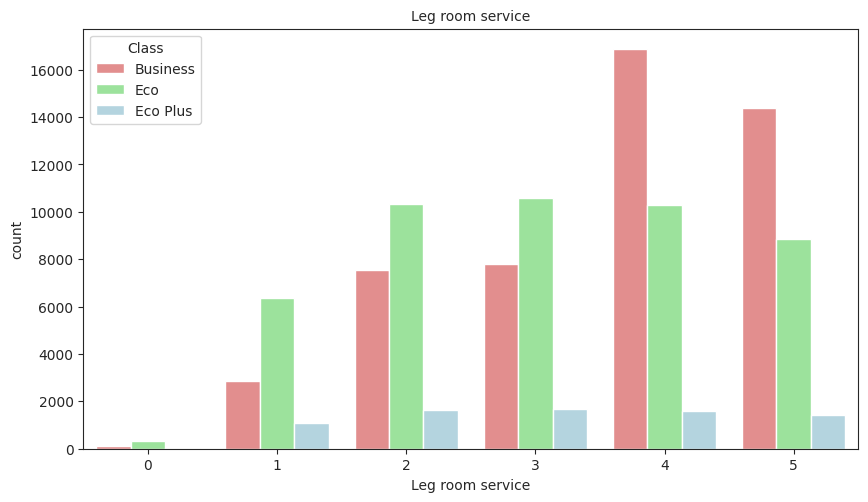

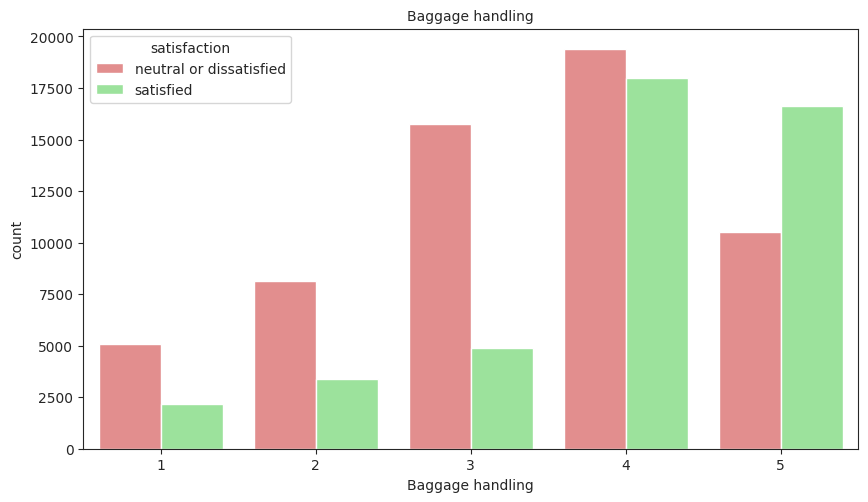

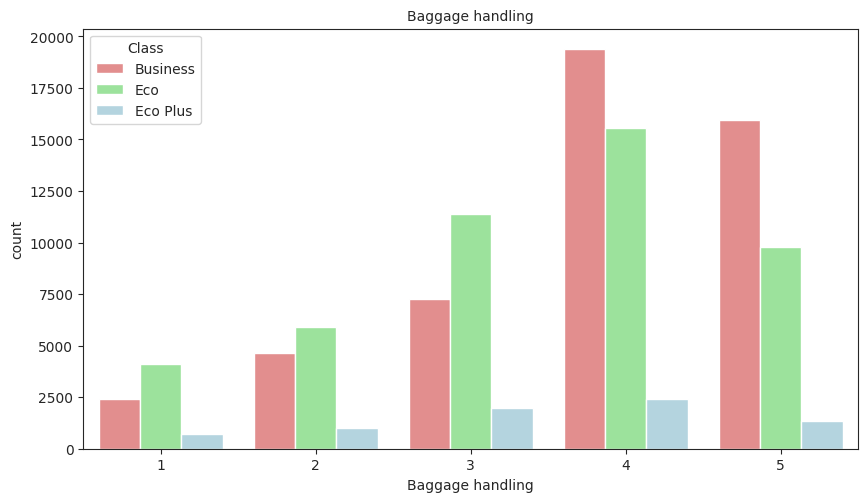

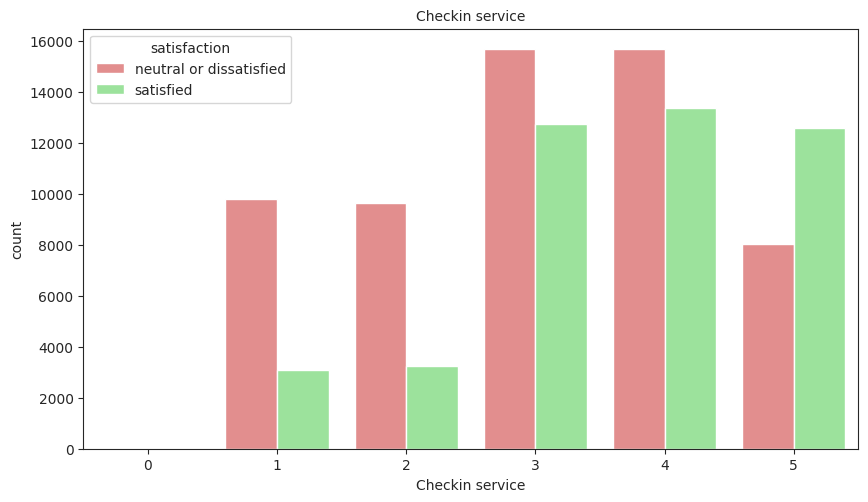

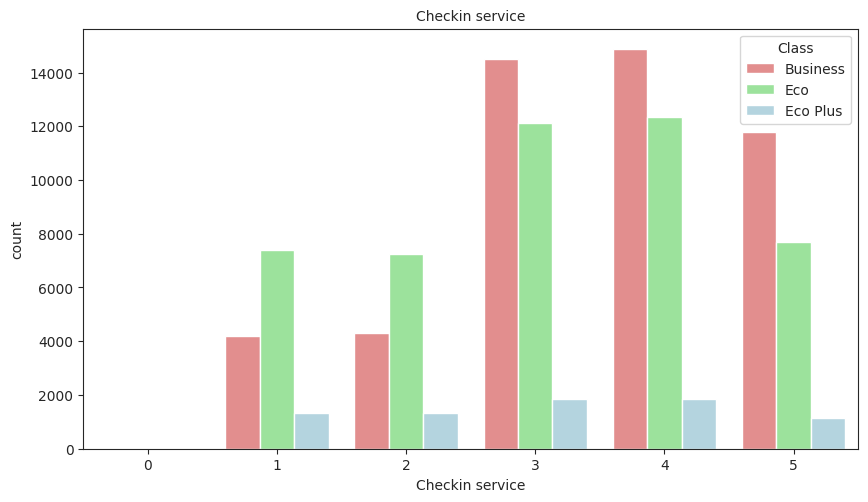

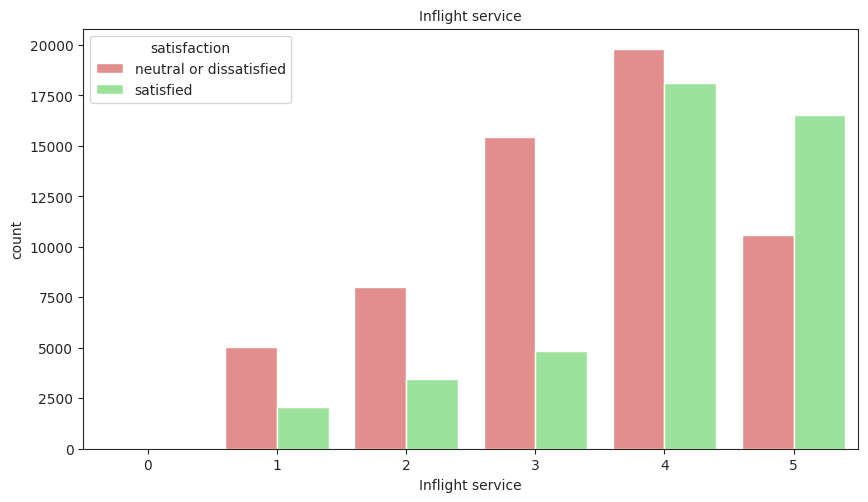

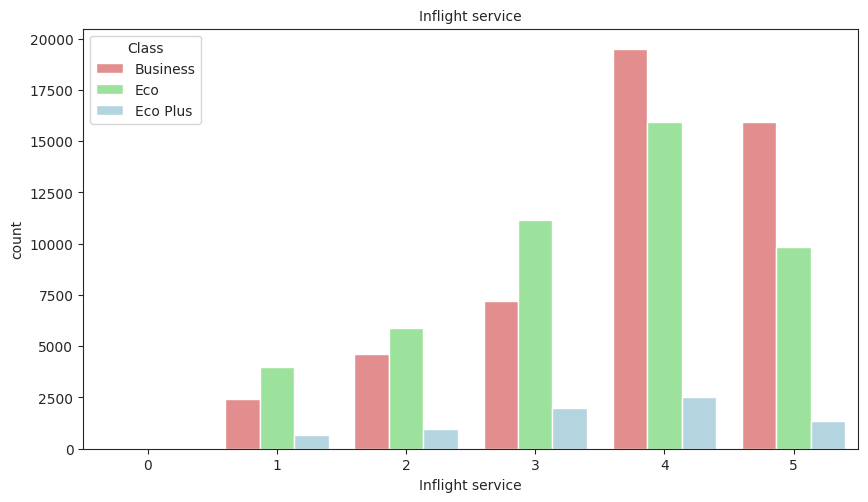

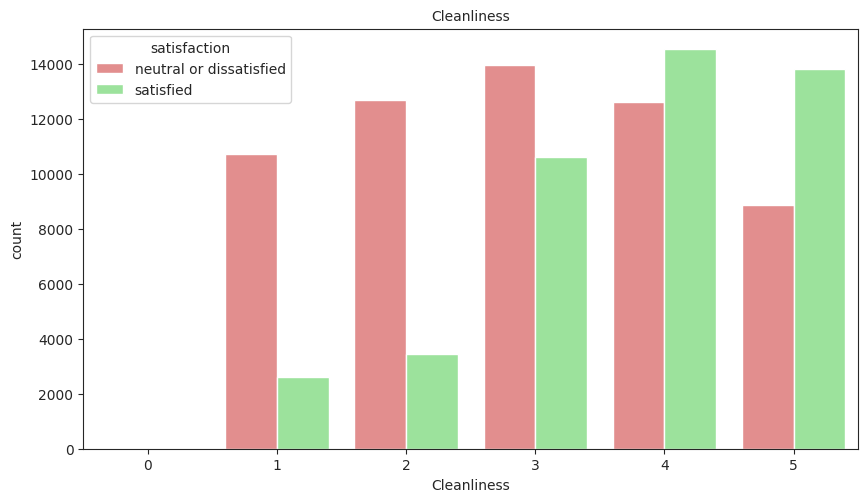

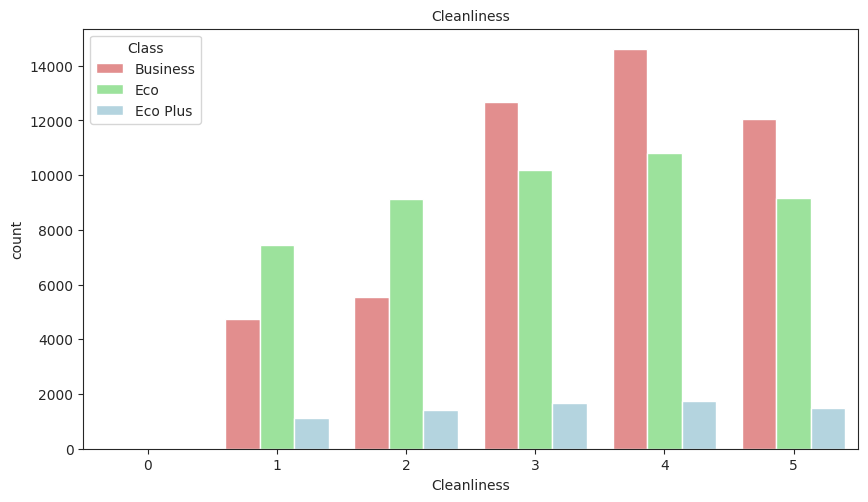

In [44]:
for column in [ 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']:
    get_satisfaction_plot(variable=column)
    get_travel_type_plot(variable=column)

### CONCLUSION

#### Most of the passengers were female.
#### Most of the population was neutral or dissatisfied by the services being provided.
#### Majority of them were the loyal customers.
#### Higher no. of people are of the age group 40-45.
#### Large no. of people were satisfied in the business class.
#### People travelling in business class are more satisfied comparison to other classes. -->

#### Correlation matrix for numerical Data

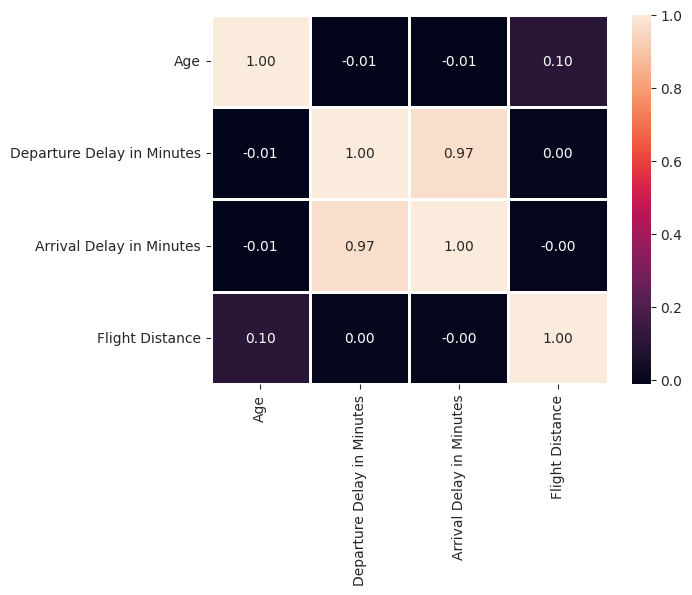

In [46]:
sns.heatmap(df_airline[numerical_features].corr(),annot=True,fmt=".2f",linewidths=.8)
plt.show()

#### Correlation matrix for overall data

<ipython-input-47-6fca699bfbb2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_airline.corr(),annot=True,fmt=".2f",linewidths=.8)


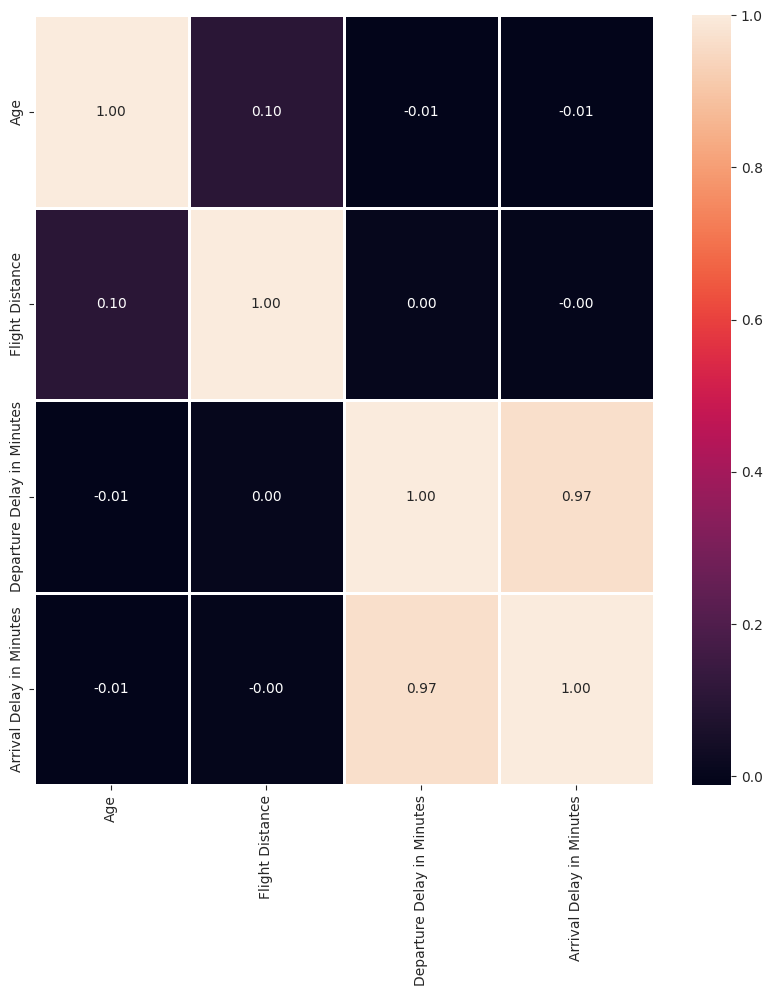

In [47]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_airline.corr(),annot=True,fmt=".2f",linewidths=.8)
plt.show()



#### Visualizing the relationship between numerical features and satisfaction variable using pair plot

In [80]:
# plt.figure(figsize=(10, 10))
# sns.pairplot(df_airline, hue='satisfaction')
# plt.title('Pairplot of Features by Satisfaction')
# plt.show()


#### Visualizing the distribution of numerical features

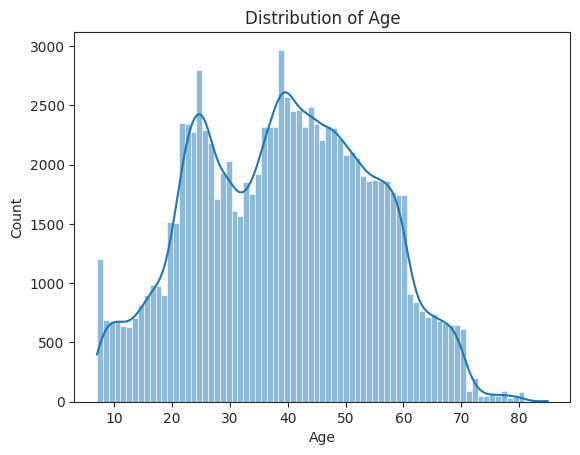

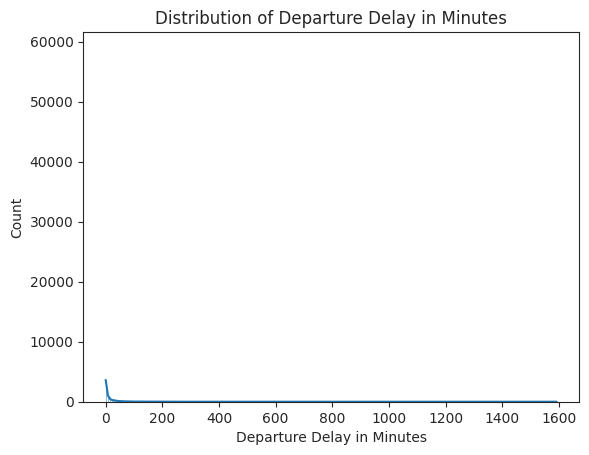

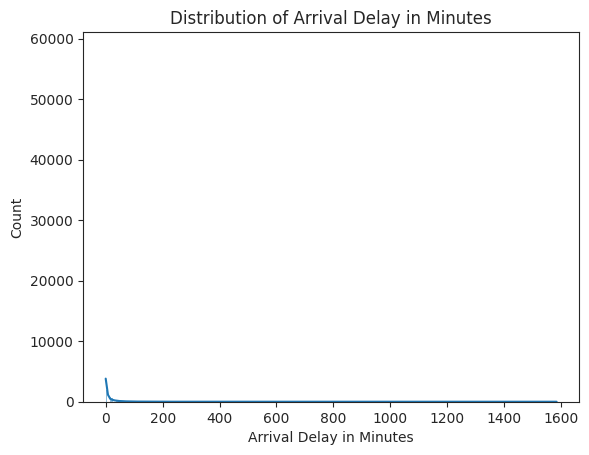

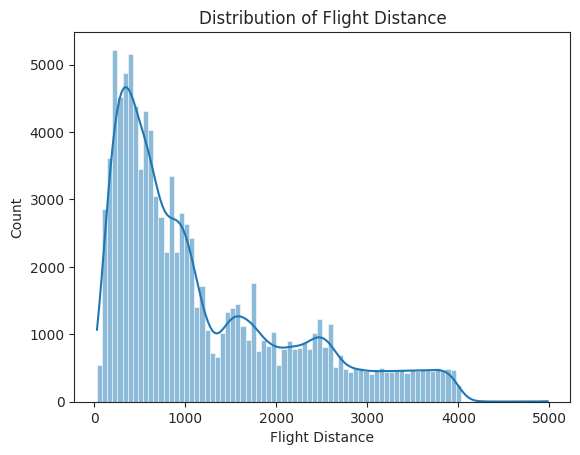

In [51]:
num_features = df_airline.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    sns.histplot(df_airline[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

#### Distribution of Flight Distance by Type of Travel and Class

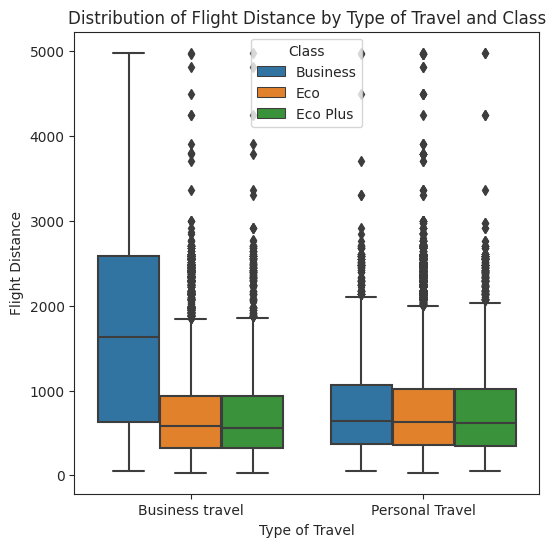

In [53]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Type of Travel', y='Flight Distance', hue='Class', data=df_airline)
plt.title('Distribution of Flight Distance by Type of Travel and Class')
plt.show()

#### Satisfaction distribution by Gender

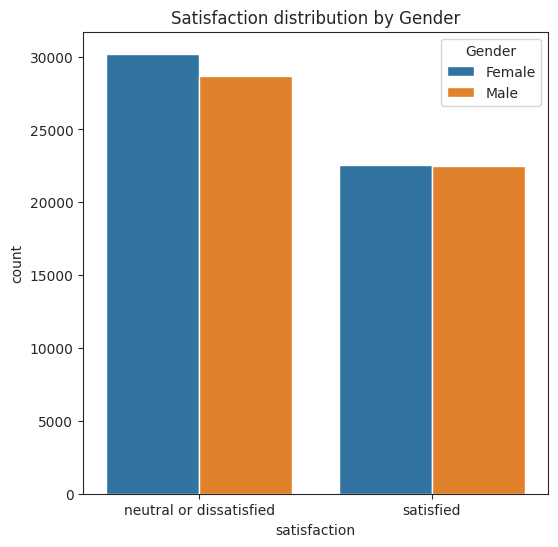

In [54]:
plt.figure(figsize=(6, 6))
sns.countplot(x='satisfaction', hue='Gender', data=df_airline)
plt.title('Satisfaction distribution by Gender')
plt.show()

### Check normality using probability plots for numerical data

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test for Age: p-value = 0.0000


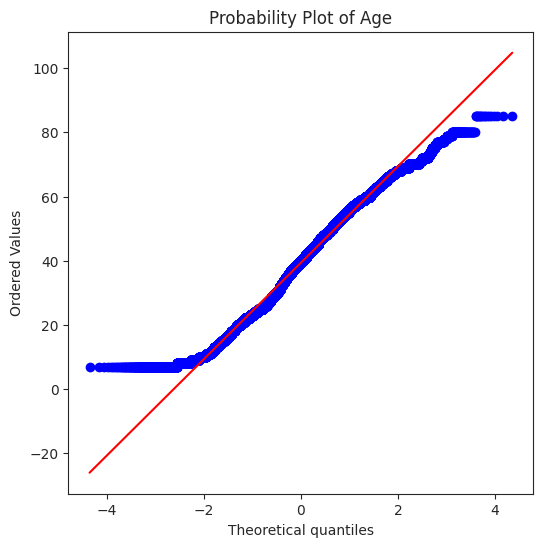

Shapiro-Wilk test for Departure Delay in Minutes: p-value = 0.0000


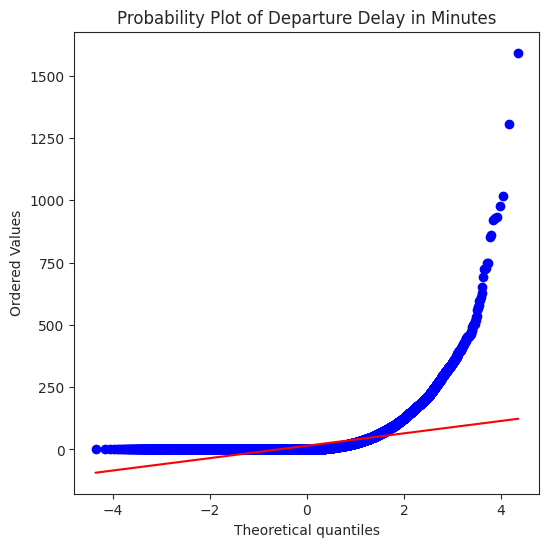

Shapiro-Wilk test for Arrival Delay in Minutes: p-value = 1.0000


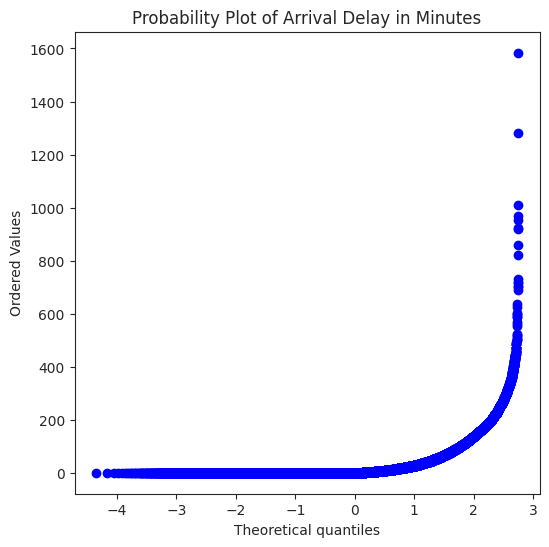

Shapiro-Wilk test for Flight Distance: p-value = 0.0000


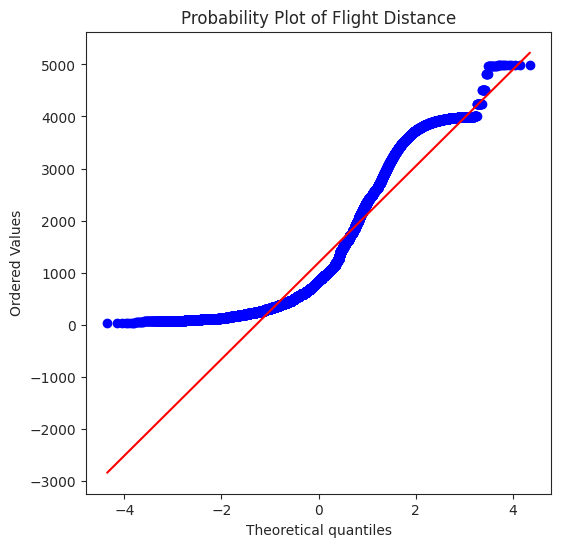

In [55]:
for feature in numerical_features:
    plt.figure(figsize=(6, 6))

    # Probability plot
    probplot(df_airline[feature], plot=plt)

    plt.title(f'Probability Plot of {feature}')


    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(df_airline[feature])
    print(f'Shapiro-Wilk test for {feature}: p-value = {p_value:.4f}')
    plt.show()

# Data Pre Processing


In [71]:
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(df_airline, columns_to_encode):
    label_encoder = LabelEncoder()
    for col in columns_to_encode:
        df_airline[col] = label_encoder.fit_transform(df_airline[col])
    return df_airline

# Usage
columns_to_encode = ['Customer Type','Gender', 'Class','Type of Travel','satisfaction']
df_encoded = label_encode_columns(df_airline, columns_to_encode)
df_encoded

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,0,1,23,0,1,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,73097,1,0,49,0,0,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,68825,1,1,30,0,0,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,54173,0,1,22,0,1,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


In [72]:
df_airline = df_airline.drop(['id'], axis=1)
df_airline.fillna(df_airline.mean(), inplace=True)
# # df_airline['Gender'] = df_airline['Gender'].replace({'Male': 1, 'Female': 0})
# df_airline['Customer Type'] = df_airline['Customer Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1})
# df_airline['Class'] = df_airline['Class'].replace({'Business': 1, 'Eco Plus': 2, 'Eco':3 })
# df_airline['Type of Travel'] = df_airline['Type of Travel'].replace({'Personal Travel': 0, 'Business travel': 1})
# df_airline['satisfaction'] = df_airline['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})
# df_airline

In [73]:
# df_airline = df_airline[df_airline["Flight Distance"]<5000]
# df_airline["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mode(), inplace=True)
df_airline.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

# Modeling


The term "base accuracy" isn't a standard metric in machine learning. However, I assume you might be referring to the accuracy that a simple baseline or naive model would achieve on your dataset. The baseline accuracy is often used as a point of reference to compare with the accuracy of your actual model. A common baseline for binary classification tasks is predicting the majority class for all instances.

### Checking for the base acuuracy of the model

In [74]:
# Assuming 'satisfaction' is your target variable
base_accuracy = df_airline['satisfaction'].value_counts(normalize=True).max()

print(f'Base Accuracy: {base_accuracy:.2%}')


Base Accuracy: 56.67%


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier

# Assume 'df' is your DataFrame with a binary target variable 'satisfaction'
X = df_airline.drop('satisfaction', axis=1)
y = df_airline['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DummyClassifier that predicts the majority class
dummy_model = DummyClassifier(strategy='most_frequent')
dummy_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = dummy_model.predict(X_test)

# Calculate baseline accuracy
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f'Baseline Accuracy: {baseline_accuracy:.2f}')


Baseline Accuracy: 0.56


In [77]:
df_airline.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [76]:
X = df_airline.drop('satisfaction', axis=1)
y = df_airline['satisfaction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Building a classification model using Random Forest Classifier

In [78]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

logloss = log_loss(y_test, y_pred)
print(f'Log Loss: {logloss:.4f}')

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Log Loss: 1.3650
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

[[11491   222]
 [  565  8503]]


### Model Evaluation using DT, RF, SVM and KNN

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# SVM
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# kNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Evaluate the models
def evaluate_model(model, model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'Classification Report ({model_name}):')
    print(classification_report(y_true, y_pred))
    print(f'Confusion Matrix ({model_name}):')
    print(confusion_matrix(y_true, y_pred))
    print('\n')

# Decision Tree Evaluation
evaluate_model(dt_model, 'Decision Tree', y_test, y_pred_dt)

# Random Forest Evaluation
evaluate_model(rf_model, 'Random Forest', y_test, y_pred_rf)

# SVM Evaluation
evaluate_model(svm_model, 'SVM', y_test, y_pred_svm)

# kNN Evaluation
evaluate_model(knn_model, 'kNN', y_test, y_pred_knn)

Decision Tree Accuracy: 0.95
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11713
           1       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

Confusion Matrix (Decision Tree):
[[11152   561]
 [  540  8528]]


Random Forest Accuracy: 0.96
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781

Confusion Matrix (Random Forest):
[[11491   222]
 [  565  8503]]


SVM Accuracy: 0.95
Classification Report (SVM):
              precision    r

# Performance Enhancement

### Using RandomForest

In [81]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are already defined
rf_model = RandomForestClassifier(random_state=42)
rfe = RFE(rf_model, n_features_to_select=5)  # Adjust the number of features as needed
X_rfe = rfe.fit_transform(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print or visualize the selected features
print(selected_features)

# Subset the data with selected features
RandomForest_X_selected = X[selected_features]
RandomForest_X_selected

Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding'],
      dtype='object')


,Type of Travel,Class,Flight Distance,Inflight wifi service,Online boarding
0,1,2,460,3,3
1,0,0,235,3,3
2,0,0,1142,2,5
3,0,0,562,2,2
4,0,0,214,3,5
...,...,...,...,...,...
103899,0,1,192,2,2
103900,0,0,2347,4,4
103901,0,0,1995,1,1
103902,0,1,1000,1,1


### Using Correlation

In [82]:
# Calculate the correlation matrix
corr_matrix = df_airline.corr()

# Sort features based on correlation with the target variable
target_correlation = corr_matrix['satisfaction'].abs().sort_values(ascending=False)

# Print or visualize the correlation values
print(target_correlation)

# Select top features based on correlation threshold (excluding the target variable)
selected_features = target_correlation[target_correlation.index != 'satisfaction'][target_correlation > 0.01].index.tolist()

# Subset the data with selected features
X_selected = X[selected_features]


satisfaction                         1.000000
Online boarding                      0.503557
Class                                0.449321
Type of Travel                       0.449000
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Customer Type                        0.187638
Ease of Online booking               0.171705
Age                                  0.137167
Arrival Delay in Minutes             0.057497
Departure/Arrival time convenient    0.051601
Departure Delay in Minutes           0.050494
Gender                            

### Using Recurssive Elimination

In [83]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, y_train are already defined
rf_model = RandomForestClassifier(random_state=42)
rfe = RFE(rf_model, n_features_to_select=5)  # Adjust the number of features as needed
X_rfe = rfe.fit_transform(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print or visualize the selected features
print(selected_features)

# Subset the data with selected features
RFE_X_selected = X[selected_features]
RFE_X_selected

Index(['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service',
       'Online boarding'],
      dtype='object')


,Type of Travel,Class,Flight Distance,Inflight wifi service,Online boarding
0,1,2,460,3,3
1,0,0,235,3,3
2,0,0,1142,2,5
3,0,0,562,2,2
4,0,0,214,3,5
...,...,...,...,...,...
103899,0,1,192,2,2
103900,0,0,2347,4,4
103901,0,0,1995,1,1
103902,0,1,1000,1,1


### Principle Component Analysis

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
df_airline['Gender'] = df_airline['Gender'].replace({'Male': 0, 'Female': 1})

# Assuming X is your feature matrix (excluding the target variable)
X = df_airline.drop('satisfaction', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get the loadings of each feature for the first principal component
loadings = pca.components_[0]

# Create a DataFrame with feature names and their loadings
feature_loadings = pd.DataFrame({'Feature': X.columns, 'Loading': loadings})

# Sort by the absolute value of loadings
feature_loadings['Loading_abs'] = feature_loadings['Loading'].abs()
feature_loadings = feature_loadings.sort_values(by='Loading_abs', ascending=False)


loadings_abs = np.abs(pca.components_)

# Average the absolute values across principal components
average_loadings = loadings_abs.mean(axis=0)

# Create a DataFrame with feature names and their average loadings
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Average Loading': average_loadings})

# Sort by the average loading in descending order
feature_ranking = feature_ranking.sort_values(by='Average Loading', ascending=False)

# Display the selected features based on loadings
selected_features = feature_loadings['Feature'].tolist()
print("Selected Features after PCA:")
print(selected_features)

# Display the feature ranking
print("Feature Ranking after PCA:")
print(feature_ranking)

Selected Features after PCA:
['Inflight entertainment', 'Seat comfort', 'Cleanliness', 'Online boarding', 'Food and drink', 'On-board service', 'Inflight service', 'Baggage handling', 'Leg room service', 'Class', 'Inflight wifi service', 'Checkin service', 'Flight Distance', 'Ease of Online booking', 'Type of Travel', 'Customer Type', 'Age', 'Departure/Arrival time convenient', 'Gate location', 'Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Gender']
Feature Ranking after PCA:
                              Feature  Average Loading
11                    Online boarding         0.172893
7   Departure/Arrival time convenient         0.158791
4                               Class         0.154411
10                     Food and drink         0.154131
6               Inflight wifi service         0.148899
1                       Customer Type         0.145979
9                       Gate location         0.144353
17                    Checkin service         0.138806
19          

### Testing the model with the Selected Feated from above Feature elimination statge

In [85]:
# Split the dataset into features (X) and target variable (y)
X = df_airline[['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service','Online boarding',"Inflight entertainment", "Seat comfort", "On-board service","Leg room service",
    "Cleanliness", "Baggage handling", "Inflight service","Checkin service", "Food and drink" ]]
y = df_airline['satisfaction']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     11713
           1       0.96      0.93      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

[[11390   323]
 [  672  8396]]


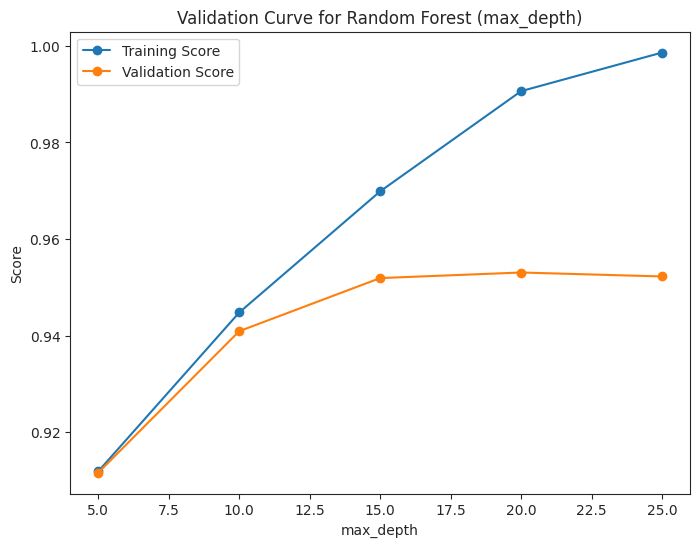

In [86]:
from sklearn.model_selection import validation_curve

# Define the range of values for a hyperparameter (e.g., max_depth)
param_range = [5, 10, 15, 20, 25]

# Calculate training and validation scores at different values of max_depth
train_scores, valid_scores = validation_curve(
    RandomForestClassifier(random_state=42),
    X_train, y_train,
    param_name='max_depth',
    param_range=param_range,
    cv=5,
    scoring='accuracy'
)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training Score', marker='o')
plt.plot(param_range, np.mean(valid_scores, axis=1), label='Validation Score', marker='o')
plt.title('Validation Curve for Random Forest (max_depth)')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.legend()
plt.show()

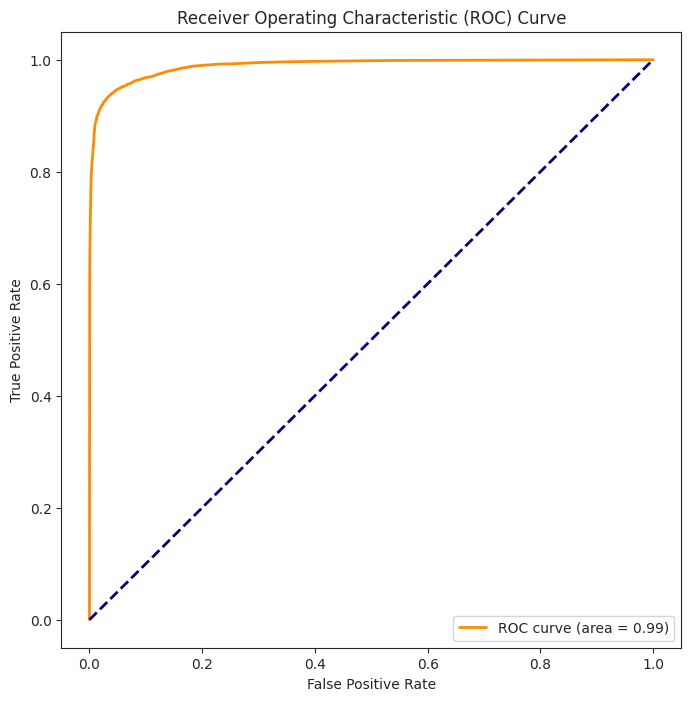

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     11713
           1       0.96      0.93      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

[[11390   323]
 [  672  8396]]


In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fit the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Get predicted probabilities for class 1
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

### Hyper Parameter Tuning

In [88]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset (replace 'your_dataset.csv' with the actual file name)


X = df_airline[['Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service','Online boarding',"Inflight entertainment", "Seat comfort", "On-board service","Leg room service",
    "Cleanliness", "Baggage handling", "Inflight service","Checkin service", "Food and drink" ]]
y = df_airline['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Hyperparameter Tuning
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=6,verbose=2)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_

# Evaluate the Best Models
def evaluate_best_model(model, model_name, X_test_data, y_true):
    y_pred = model.predict(X_test_data)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'{model_name} Accuracy (Best Model): {accuracy:.2f}')
    print(f'Classification Report ({model_name}):')
    print(classification_report(y_true, y_pred))
    print(f'Confusion Matrix ({model_name}):')
    print(confusion_matrix(y_true, y_pred))
    print('\n')

# Evaluate Best Random Forest Model
evaluate_best_model(rf_best_model, 'Random Forest', X_test, y_test)




Fitting 5 folds for each of 108 candidates, totalling 540 fits
Random Forest Accuracy (Best Model): 0.95
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11713
           1       0.97      0.93      0.95      9068

    accuracy                           0.95     20781
   macro avg       0.96      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781

Confusion Matrix (Random Forest):
[[11409   304]
 [  650  8418]]


